In [1]:
from uncertainties import ufloat, unumpy
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline

- be careful of dates
- plot V and I lightcurves
    - which has higher variability?
- V-I color
    - closest point (points in V and I that are less than a day apart
    - better: interpolation
        - I band to dates of V band data
        
- O-II:  smc_sc11_v_53243
- O-III: smc110.4.v.39164
- O-IV:  smc725.04.v.68

- naming conventions

# Load Files into DataFrames
> V mag and then I mag for each object
> weird ordering going back and forth between sources right now

## 1. J01077 

In [2]:
jv2 = np.loadtxt('smc_sc11_v_53243.dat',usecols=range(0,3))
#turn into panda dataframe with labelled columns based on known time units (Julian Date)
jv2 = pd.DataFrame(jv2,columns=['MJD-50000','V mag','V mag err'])

In [3]:
jv3 = np.loadtxt('smc110.4.v.39164.dat',usecols=range(0,3))
jv3 = pd.DataFrame(jv3,columns=['MJD-50000','V mag','V mag err'])
jv4 = np.loadtxt('smc725.04.v.68.dat',usecols=range(0,3))
jv4 = pd.DataFrame(jv4,columns=['MJD-50000','V mag','V mag err'])

In [4]:
#reading in combined I band data (from TreiberOglePeriodicFlares.ipynb)
i24 = pd.read_csv('comb.csv',usecols=range(1,4)) 
i24.head()

,MJD-50000,I mag,I mag err
0,625.43473,15.262,0.004
1,627.42366,15.280,0.004
2,628.43299,15.266,0.004
3,629.37682,15.293,0.004
4,632.43331,15.291,0.005


In [5]:
#apparently already calibrated
jv2 = np.loadtxt('smc_sc11_v_53243.dat',usecols=range(0,3))
#turn into panda dataframe with labelled columns based on known time units (Julian Date)
jv2 = pd.DataFrame(jv2,columns=['MJD-50000','V mag','V mag err'])
jv3 = np.loadtxt('smc110.4.v.39164.dat',usecols=range(0,3))
jv3 = pd.DataFrame(jv3,columns=['MJD-50000','V mag','V mag err'])
jv4 = np.loadtxt('smc725.04.v.68.dat',usecols=range(0,3))
jv4 = pd.DataFrame(jv4,columns=['MJD-50000','V mag','V mag err'])

In [6]:
#using original I band files rather than shifted and combined
ji2 = np.loadtxt('smc_sc11_i_53243.dat',usecols=range(0,3))
#turn into panda dataframe with labelled columns based on known time units (Julian Date)
ji2 = pd.DataFrame(ji2,columns=['JD','I mag','I mag err'])
ji2['MJD']=ji2['JD']-2400000.5
ji2['MJD-50000']=ji2['MJD']-50000

ji3 = np.loadtxt('smc110.4.19754.dat',usecols=range(0,3))
ji3 = pd.DataFrame(ji3,columns=['MJD-50000','I mag','I mag err'])
ji4 = np.loadtxt('OGLE_IV.dat',usecols=range(0,3))
ji4 = pd.DataFrame(ji4,columns=['JD','I mag','I mag err'])
ji4['MJD']=ji4['JD']-2400000.5
ji4['I mag']=ji4['I mag']
ji4['MJD-50000']=ji4['MJD']-50000

In [7]:
ji4.head()

,JD,I mag,I mag err,MJD,MJD-50000
0,2.455347e+06,15.160,0.003,55346.43180,5346.43180
1,2.455348e+06,15.156,0.003,55347.41257,5347.41257
2,2.455359e+06,15.149,0.003,55358.40324,5358.40324
3,2.455365e+06,15.123,0.003,55364.41546,5364.41546
4,2.455377e+06,15.109,0.003,55376.43746,5376.43746


## 2. LXP 69.5

In [8]:
lv = np.loadtxt('lmc519.22.v.25564.dat',usecols=range(0,3))
lv = pd.DataFrame(lv,columns=['MJD-50000','V mag','V mag err'])

In [9]:
li = np.loadtxt('phot.dat',usecols=range(0,3))
li = pd.DataFrame(li,columns=['JD','I mag','I mag err'])
li['MJD-50000']=li['JD']-2450000.5
li['I mag']=li['I mag']+.041 #calibrated I mag 

In [10]:
li.head() #as expected besides fraction of a day

,JD,I mag,I mag err,MJD-50000
0,2.455261e+06,14.742,0.003,5260.14719
1,2.455262e+06,14.729,0.003,5261.15051
2,2.455263e+06,14.735,0.003,5262.14427
3,2.455265e+06,14.733,0.003,5264.11167
4,2.455266e+06,14.730,0.003,5265.11299


In [11]:
def sf(filename):
    '''
    Saves figure in OglePeriods/VIFigs/
    '''
    plt.savefig('VIFigs/'+filename+'.png',dpi=200,bbox_inches='tight')

# Plot Lightcurves in Each Filter

## 1. LXP 69.5

Text(0, 0.5, 'OGLE V magnitude')

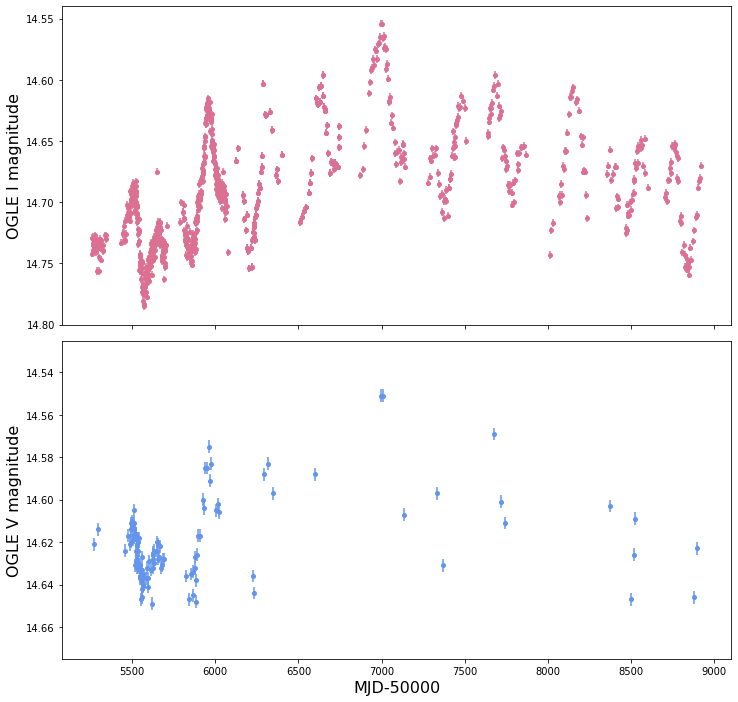

In [12]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(12,12))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].set_ylim(14.8,14.54)
ax[1].set_xlabel('MJD-50000',fontsize=16)
ax[0].set_ylabel('OGLE I magnitude',fontsize=16)
ax[1].errorbar(lv['MJD-50000'],lv['V mag'],yerr=lv['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].set_ylim(14.675,14.525)
ax[1].set_ylabel('OGLE V magnitude',fontsize=16)
#sf('VandI')
#plt.tick_params(labelsize=14)

Text(0, 0.5, 'OGLE I magnitude')

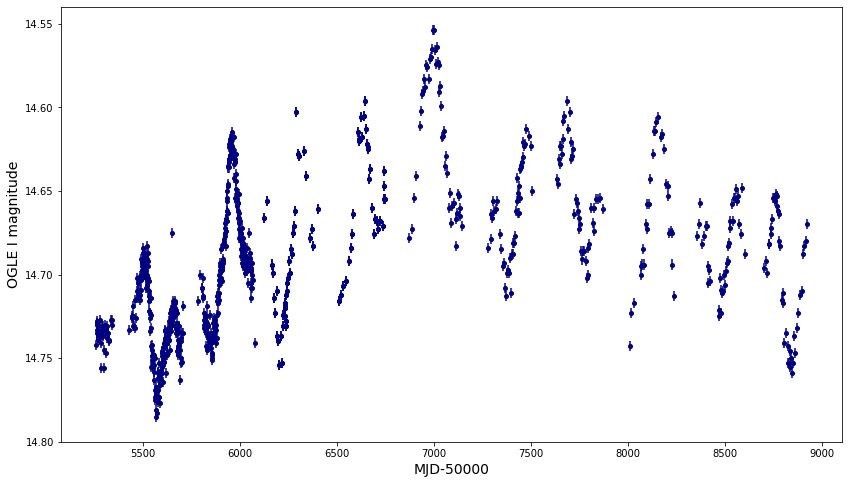

In [13]:
plt.figure(figsize=(14,8))
plt.errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='navy')
plt.ylim(14.8,14.54)
plt.xlabel('MJD-50000',fontsize=14)
plt.ylabel('OGLE I magnitude',fontsize=14)
#sf('Ifull')
#plt.tick_params(labelsize=14)

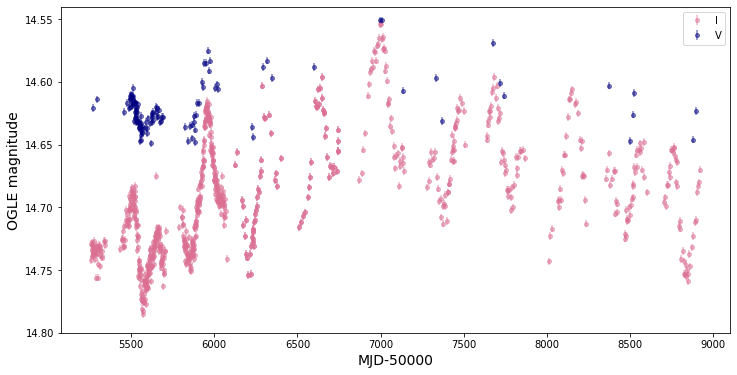

In [14]:
plt.figure(figsize=(12,6))
plt.errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,alpha=.5,linestyle='None',color='palevioletred',label='I')
plt.xlabel('MJD-50000',fontsize=14)
plt.ylabel('OGLE magnitude',fontsize=14)
plt.errorbar(lv['MJD-50000'],lv['V mag'],yerr=lv['V mag err'],marker='o',markersize=4,alpha=.5,linestyle='None',color='navy',label='V')
plt.ylim(14.8,14.54)
#plt.tick_params(labelsize=14)
plt.legend()
#sf('VIoneplot')

## 2.  J01077 

Text(0, 0.5, 'OGLE V magnitude')

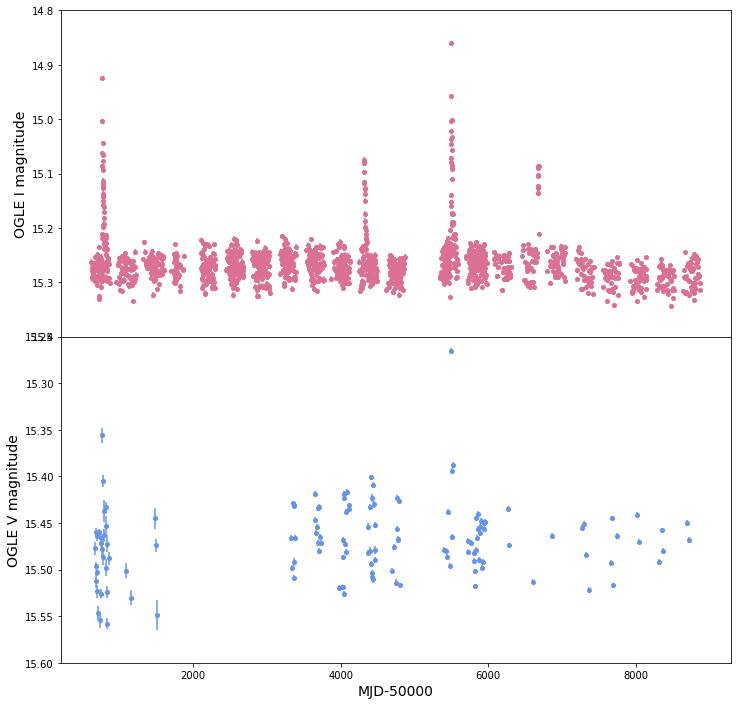

In [15]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(12,12))
plt.subplots_adjust(hspace=0)
ax[0].errorbar(i24['MJD-50000'],i24['I mag'],yerr=i24['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].set_ylim(15.4,14.8)
ax[1].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[1].errorbar(jv2['MJD-50000'],jv2['V mag'],yerr=jv2['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].errorbar(jv3['MJD-50000'],jv3['V mag'],yerr=jv3['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].errorbar(jv4['MJD-50000'],jv4['V mag'],yerr=jv4['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].set_ylim(15.6,15.25)
ax[1].set_ylabel('OGLE V magnitude',fontsize=14)
#plt.tick_params(labelsize=14)

(15.6, 15.25)

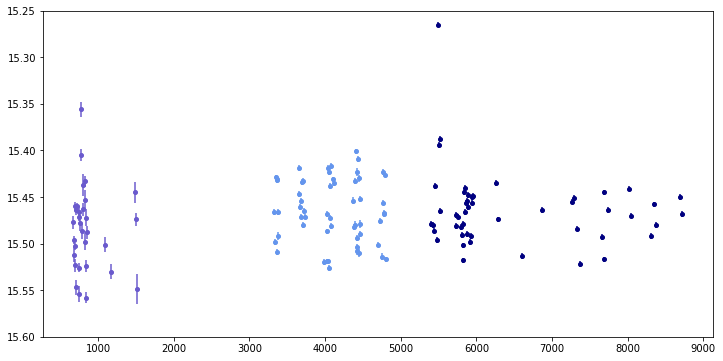

In [16]:
plt.figure(figsize=(12,6))
plt.errorbar(jv2['MJD-50000'],jv2['V mag'],yerr=jv2['V mag err'],marker='o',markersize=4,linestyle='None',color='slateblue')
plt.errorbar(jv3['MJD-50000'],jv3['V mag'],yerr=jv3['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
plt.errorbar(jv4['MJD-50000'],jv4['V mag'],yerr=jv4['V mag err'],marker='o',markersize=4,linestyle='None',color='navy')

plt.ylim(15.6,15.25)

#### Line Up Medians Again
> - another option is to compare raw epoch data separately
> - ask about this, b/c aligning value arbitrary

In [17]:
print(np.median(jv2['V mag']))
print(np.median(jv3['V mag']))
print(np.median(jv4['V mag']))

15.478
15.4665
15.468


In [18]:
jv2['V mag'] = jv2['V mag'] - .01
jv4['V mag'] = jv4['V mag'] + .0015

(15.6, 15.25)

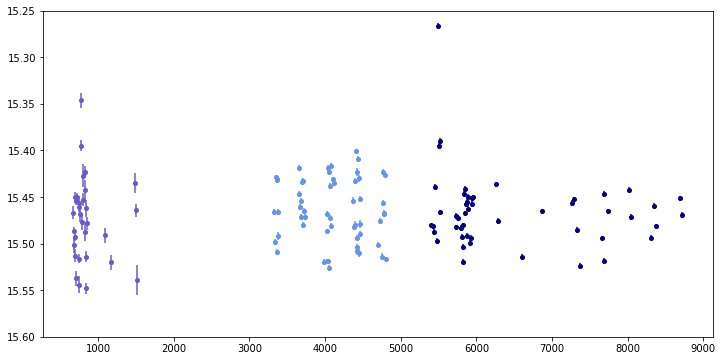

In [19]:
plt.figure(figsize=(12,6))
plt.errorbar(jv2['MJD-50000'],jv2['V mag'],yerr=jv2['V mag err'],marker='o',markersize=4,linestyle='None',color='slateblue')
plt.errorbar(jv3['MJD-50000'],jv3['V mag'],yerr=jv3['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
plt.errorbar(jv4['MJD-50000'],jv4['V mag'],yerr=jv4['V mag err'],marker='o',markersize=4,linestyle='None',color='navy')

plt.ylim(15.6,15.25)

Text(0, 0.5, 'OGLE V magnitude')

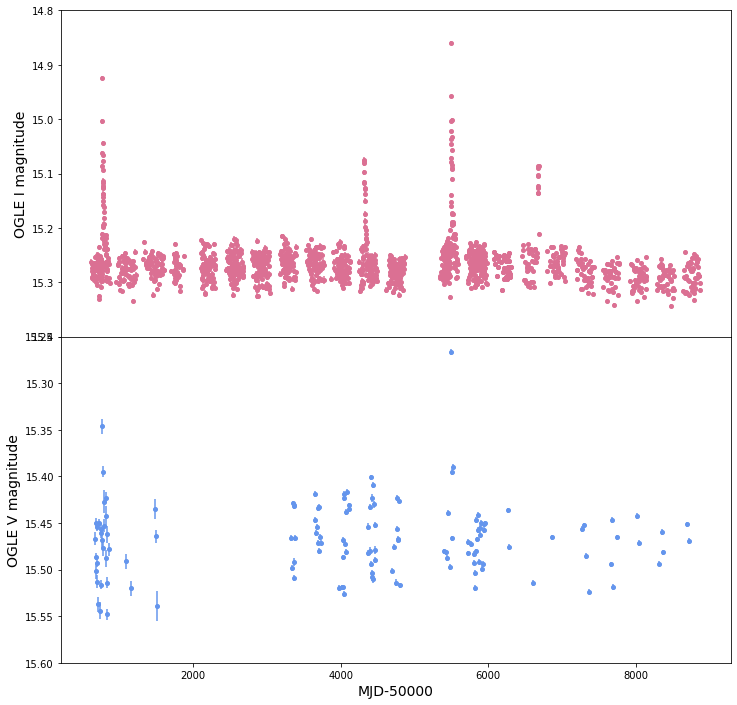

In [20]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(12,12))
plt.subplots_adjust(hspace=0)
ax[0].errorbar(i24['MJD-50000'],i24['I mag'],yerr=i24['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].set_ylim(15.4,14.8)
ax[1].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[1].errorbar(jv2['MJD-50000'],jv2['V mag'],yerr=jv2['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].errorbar(jv3['MJD-50000'],jv3['V mag'],yerr=jv3['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].errorbar(jv4['MJD-50000'],jv4['V mag'],yerr=jv4['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].set_ylim(15.6,15.25)
ax[1].set_ylabel('OGLE V magnitude',fontsize=14)
#plt.tick_params(labelsize=14)
#sf('JVI')

In [22]:
jv = [jv2,jv3,jv4]
jv = pd.concat(jv)

Text(0, 0.5, 'OGLE magnitude')

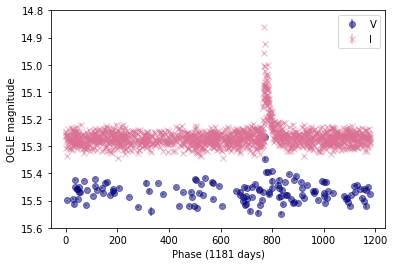

In [23]:
#one plot; can shift I mag up more to see better (.2)
jv['Phase 1181'] = jv['MJD-50000']%1181
plt.errorbar(jv['Phase 1181'], jv['V mag'],yerr=jv['V mag err'],color='navy',linestyle='none',marker='o',alpha=.5,label='V')
plt.ylim(15.6,14.8)
i24['Phase 1181'] = i24['MJD-50000']%1181
plt.errorbar(i24['Phase 1181'], i24['I mag'],yerr=i24['I mag err'],color='palevioletred',linestyle='none',marker='x',alpha=.5,label='I')
plt.legend()
plt.xlabel('Phase (1181 days)')
plt.ylabel('OGLE magnitude')
#sf('JVIstacked')

# Interpolating Between I band Values
then can do color plots

## 1.  J01077 

In [24]:
si24 = i24.sort_values(by='MJD-50000')

In [25]:
np.array(si24['MJD-50000'])

array([ 625.43473,  627.42366,  628.43299, ..., 8857.09224, 8862.1038 ,
       8869.08689])

In [26]:
jv['MJD-50000'].shape

(136,)

In [27]:
j_interp = np.interp(jv['MJD-50000'],si24['MJD-50000'],si24['I mag'])



(750, 800)

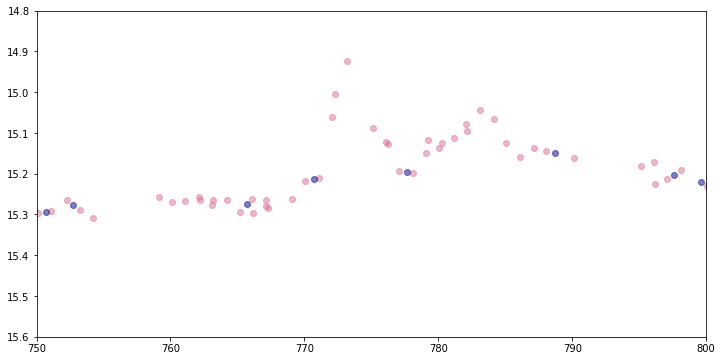

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(i24['MJD-50000'], i24['I mag'],color='palevioletred',alpha=.5)
plt.scatter(jv['MJD-50000'],j_interp,alpha=.5,color='navy')
plt.ylim(15.6,14.8)
plt.xlim(750,800)
#sf('interpex')

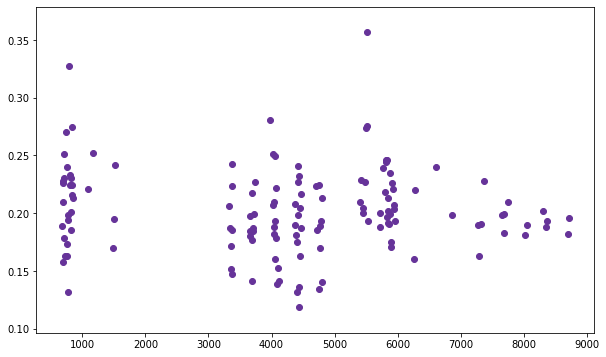

In [29]:
#plot V-I color, no error for now
plt.figure(figsize=(10,6))
plt.scatter(jv['MJD-50000'],jv['V mag']-j_interp,color='rebeccapurple')

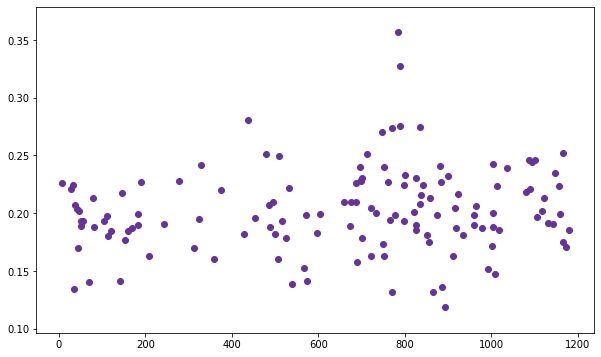

In [30]:
#color vs. phase
plt.figure(figsize=(10,6))
plt.scatter(jv['Phase 1181'],jv['V mag']-j_interp,color='rebeccapurple')

In [31]:
je = np.ones(len(j_interp))
je = je*.006

verr = unumpy.uarray(jv['V mag'],jv['V mag err'])
jerr = unumpy.uarray(j_interp,je)
v_j = verr-jerr
v_j_err = unumpy.std_devs(v_j)

(15.57, 15.25)

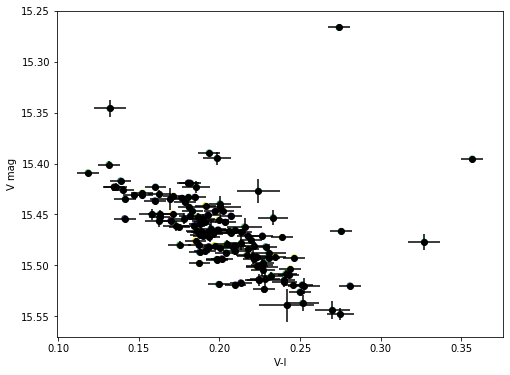

In [32]:
#color-magnitude
#plot V-I color, no error for now
plt.figure(figsize=(8,6))
plt.scatter(jv['V mag']-j_interp,jv['V mag'],c=jv['Phase 1181'])
plt.errorbar(jv['V mag']-j_interp,jv['V mag'],yerr=jv['V mag err'],xerr=v_j_err,color='black',linestyle='none',marker='o')
plt.ylabel('V mag') 
plt.xlabel('V-I') #bluer when brighter; outliers during flares? need to get more spec phase values for those
plt.ylim(15.57,15.25)
#sf('Jcolormag')

(15.57, 15.25)

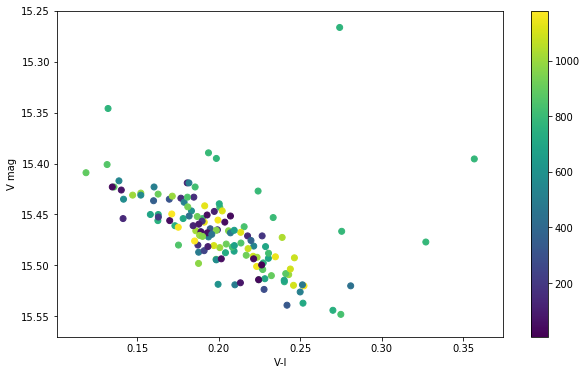

In [33]:
#color-magnitude
#plot V-I color, no error for now
plt.figure(figsize=(10,6))
plt.scatter(jv['V mag']-j_interp,jv['V mag'],c=jv['Phase 1181'])
plt.colorbar() #remember flares happen around 800
plt.ylabel('V mag') 
plt.xlabel('V-I') #bluer when brighter; outliers during flares? need to get more spec phase values for those
plt.ylim(15.57,15.25)
#sf('Jcolormagcm')

Text(0, 0.5, 'OGLE V-I')

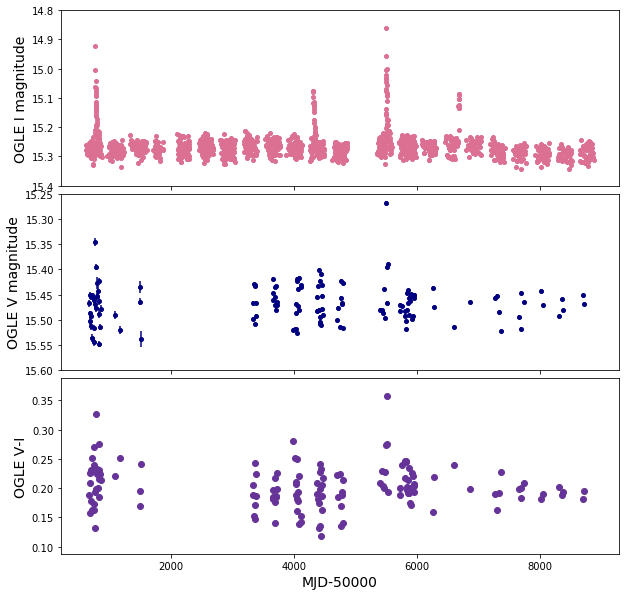

In [34]:
#plot V, I, and V-I vs. time
fig,ax = plt.subplots(3,1,sharex=True,figsize=(10,10))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(i24['MJD-50000'],i24['I mag'],yerr=i24['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].set_ylim(15.4,14.8)
ax[2].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[1].errorbar(jv['MJD-50000'],jv['V mag'],yerr=jv['V mag err'],marker='o',markersize=4,linestyle='None',color='navy')
ax[1].set_ylim(15.6,15.25)
ax[2].scatter(jv['MJD-50000'],jv['V mag']-j_interp,color='rebeccapurple')
ax[1].set_ylabel('OGLE V magnitude',fontsize=14)
ax[2].set_ylabel('OGLE V-I',fontsize=14)
#sf('JVIV-I')

Text(0, 0.5, 'OGLE V-I')

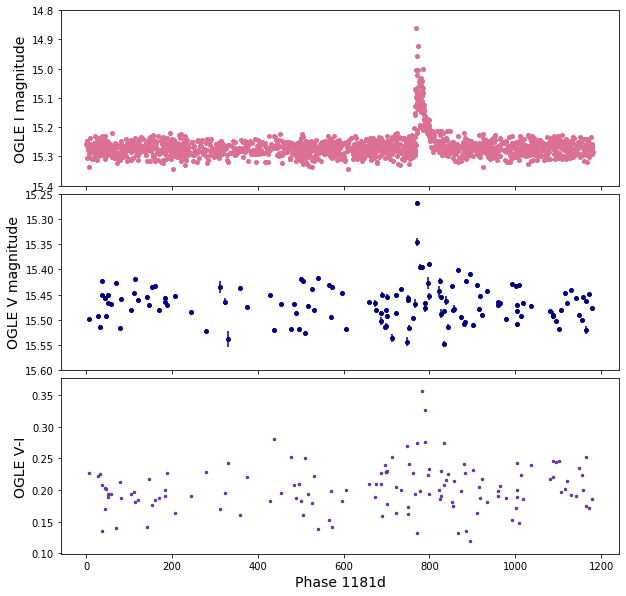

In [35]:
#plot V, I, and V-I vs. phase
fig,ax = plt.subplots(3,1,sharex=True,figsize=(10,10))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(i24['Phase 1181'],i24['I mag'],yerr=i24['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].set_ylim(15.4,14.8)
ax[2].set_xlabel('Phase 1181d',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[1].errorbar(jv['Phase 1181'],jv['V mag'],yerr=jv['V mag err'],marker='o',markersize=4,linestyle='None',color='navy')
ax[1].set_ylim(15.6,15.25)
ax[2].scatter(jv['Phase 1181'],jv['V mag']-j_interp,s=6,color='rebeccapurple')
ax[1].set_ylabel('OGLE V magnitude',fontsize=14)
ax[2].set_ylabel('OGLE V-I',fontsize=14)
#sf('Jmagphase')

Text(0, 0.5, 'OGLE V mag')

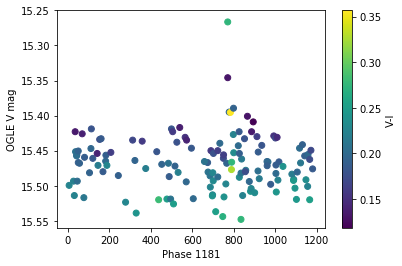

In [36]:
# V vs phase with V-I as color
plt.scatter(jv['Phase 1181'],jv['V mag'],c=jv['V mag']-j_interp)
plt.colorbar(label='V-I')
plt.ylim(15.56,15.25)
plt.xlabel('Phase 1181')
plt.ylabel('OGLE V mag') #bluer when brighter but not necessarily during flares?
#is interpolation see both as flaring?
#sf('Jmagphasecm')

(15.55, 14.8)

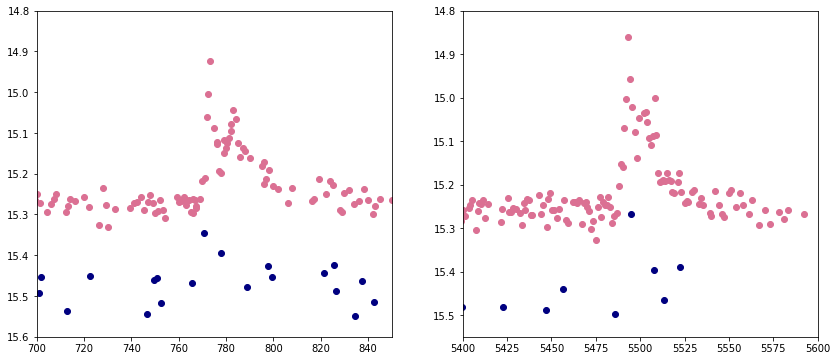

In [37]:
#zoom in on two flare that we have in both I and V
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].scatter(i24['MJD-50000'],i24['I mag'],color='palevioletred')
ax[0].scatter(jv['MJD-50000'],jv['V mag'],color='navy')
ax[0].set_xlim(700,850)
ax[0].set_ylim(15.6,14.8)
ax[1].scatter(i24['MJD-50000'],i24['I mag'],color='palevioletred')
ax[1].scatter(jv['MJD-50000'],jv['V mag'],color='navy')
ax[1].set_xlim(5400,5600)
ax[1].set_ylim(15.55,14.8)


> Okay, so a potential issue is shown above. We have two flares in V band, and only a couple points for each one. They look more obvious on the full plot, but here you can tell how uncertain/sparse these data are. Another issue is that -- either b/c of sampling or *maybe* something physical, the "peaks" in V are not aligned with those in I, which may throw off the interpolation. So let's now check on the interpolation. We want to utimately know if we can trust the V-I values around these two flares.

(15.55, 14.8)

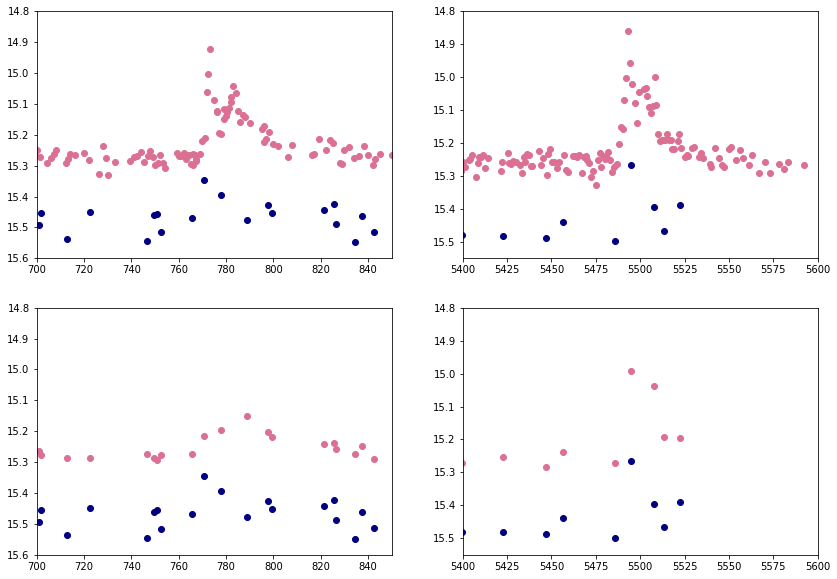

In [38]:
#zoom in on two flare that we have in both I and V
fig,ax = plt.subplots(2,2,figsize=(14,10))
ax[0][0].scatter(i24['MJD-50000'],i24['I mag'],color='palevioletred')
ax[0][0].scatter(jv['MJD-50000'],jv['V mag'],color='navy')
ax[0][0].set_xlim(700,850)
ax[0][0].set_ylim(15.6,14.8)
ax[0][1].scatter(i24['MJD-50000'],i24['I mag'],color='palevioletred')
ax[0][1].scatter(jv['MJD-50000'],jv['V mag'],color='navy')
ax[0][1].set_xlim(5400,5600)
ax[0][1].set_ylim(15.55,14.8)

ax[1][0].scatter(jv['MJD-50000'],j_interp,color='palevioletred',label='interpolated I')
ax[1][0].scatter(jv['MJD-50000'],jv['V mag'],color='navy')

ax[1][0].set_xlim(700,850)
ax[1][1].scatter(jv['MJD-50000'],j_interp,color='palevioletred',label='interpolated I')
ax[1][1].scatter(jv['MJD-50000'],jv['V mag'],color='navy')

ax[1][1].set_xlim(5400,5600)
ax[1][0].set_ylim(15.6,14.8)
ax[1][1].set_ylim(15.55,14.8)

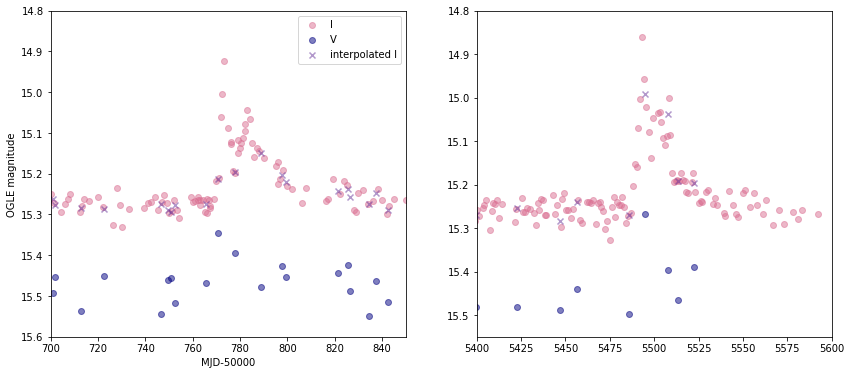

In [39]:
#zoom in on two flare that we have in both I and V
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].scatter(i24['MJD-50000'],i24['I mag'],alpha=.5,color='palevioletred',label='I')
ax[0].scatter(jv['MJD-50000'],jv['V mag'],alpha=.5,color='navy',label='V')
ax[0].set_xlim(700,850)
ax[0].set_ylim(15.6,14.8)
ax[1].scatter(i24['MJD-50000'],i24['I mag'],alpha=.5,color='palevioletred')
ax[1].scatter(jv['MJD-50000'],j_interp,color='rebeccapurple',marker='x',alpha=.5,label='interpolated I')
ax[0].scatter(jv['MJD-50000'],j_interp,color='rebeccapurple',marker='x',alpha=.5,label='interpolated I')

ax[1].scatter(jv['MJD-50000'],jv['V mag'],alpha=.5,color='navy')
ax[1].set_xlim(5400,5600)
ax[0].set_xlabel('MJD-50000')
ax[0].set_ylabel('OGLE magnitude')
ax[1].set_ylim(15.55,14.8)
ax[0].legend()
#sf('Jtwoflares')

## 2. LXP 69.5

In [40]:
l_interp = np.interp(lv['MJD-50000'],li['MJD-50000'],li['I mag'])

(6000, 7000)

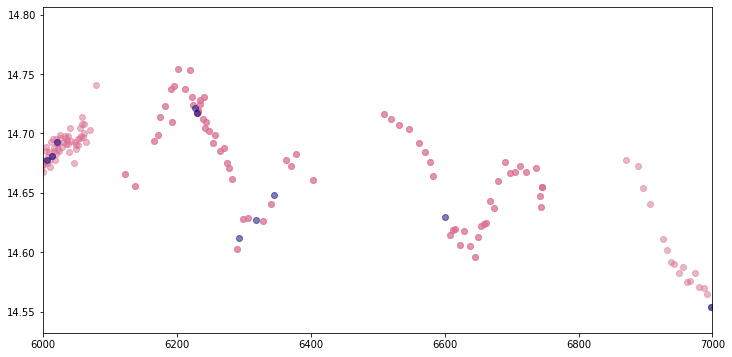

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(li['MJD-50000'], li['I mag'],color='palevioletred',alpha=.5)
plt.scatter(lv['MJD-50000'],l_interp,alpha=.5,color='navy')
#plt.ylim(15.6,14.8)
plt.xlim(6000,7000)
#sf('interpex')

In [42]:
li['I mag err'].describe()

count    8.510000e+02
mean     3.000000e-03
std      1.692350e-17
min      3.000000e-03
25%      3.000000e-03
50%      3.000000e-03
75%      3.000000e-03
max      3.000000e-03
Name: I mag err, dtype: float64

# for now, errors for interpolated I values are double their usual value, so .006 magnitudes

In [43]:
ie = np.ones(len(l_interp))
ie = ie*.006

In [44]:
verr = unumpy.uarray(lv['V mag'],lv['V mag err'])
ierr = unumpy.uarray(l_interp,ie)
v_i = verr-ierr
v_i_err = unumpy.std_devs(v_i)

(14.66, 14.54)

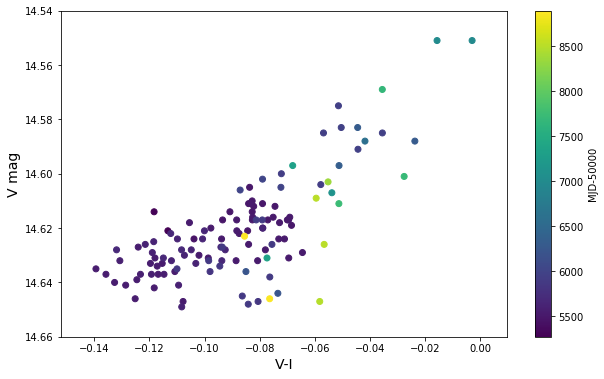

In [45]:
#color-magnitude
#plot V-I color, no error for now
plt.figure(figsize=(10,6))
plt.scatter(lv['V mag']-l_interp,lv['V mag'],c=lv['MJD-50000'])
plt.colorbar(label='MJD-50000')
plt.ylabel('V mag',fontsize=14)
plt.xlabel('V-I',fontsize=14) #redder when brighter, besides during flares?
plt.ylim(14.66,14.54)
#sf('colormagcm')

(14.66, 14.54)

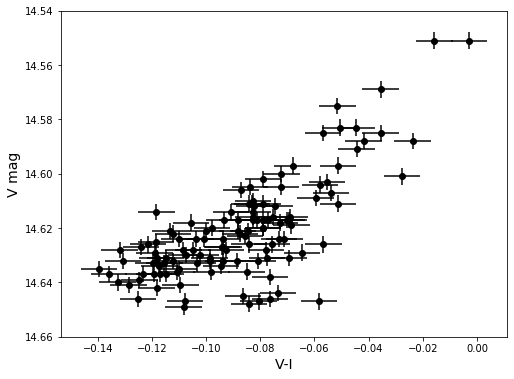

In [46]:
#color-magnitude
#plot V-I color, no error for now
plt.figure(figsize=(8,6))
plt.errorbar(lv['V mag']-l_interp,lv['V mag'],yerr=lv['V mag err'],xerr=v_i_err,color='black',linestyle='none',marker='o')
#plt.colorbar()
plt.ylabel('V mag',fontsize=14)
plt.xlabel('V-I',fontsize=14) #redder when brighter, besides during flares?
plt.ylim(14.66,14.54)
#plt.text(14.545,0.01,'red and bright')
#plt.savefig('color-mag2.png',dpi=200,bbox_inches='tight')
#sf('colormag')

In [47]:
lv['Phase 164'] = lv['MJD-50000'] % 164

Text(0, 0.5, 'OGLE V-I')

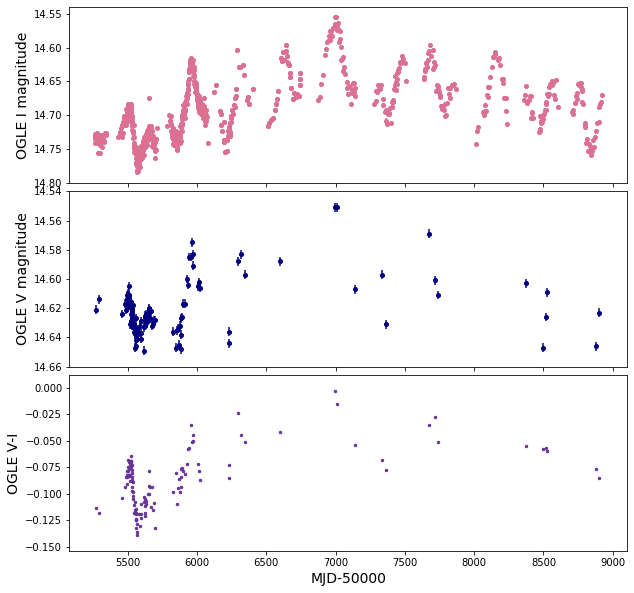

In [48]:
#plot V, I, and V-I vs. time
fig,ax = plt.subplots(3,1,sharex=True,figsize=(10,10))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].set_ylim(14.8,14.54)
ax[2].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[1].errorbar(lv['MJD-50000'],lv['V mag'],yerr=lv['V mag err'],marker='o',markersize=4,linestyle='None',color='navy')
ax[1].set_ylim(14.66,14.54)
ax[2].scatter(lv['MJD-50000'],lv['V mag']-l_interp,s=6,color='rebeccapurple')
ax[1].set_ylabel('OGLE V magnitude',fontsize=14)
ax[2].set_ylabel('OGLE V-I',fontsize=14)
#sf('VIV-I')

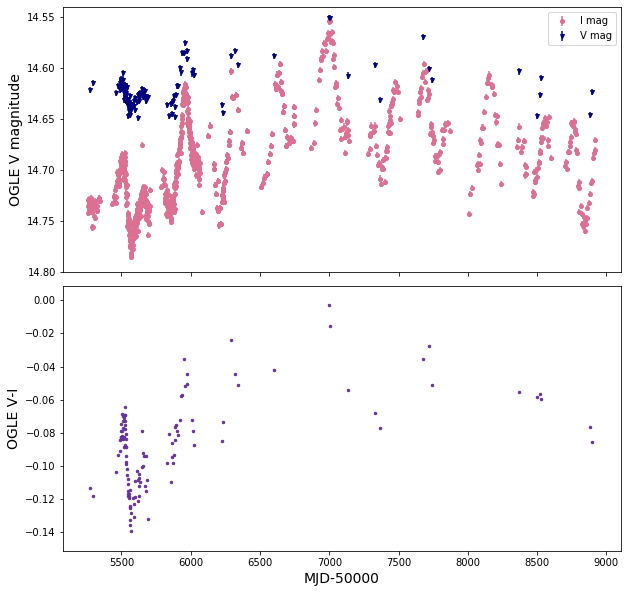

In [49]:
#plot V, I, and V-I vs. time
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,10))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred',label='I mag')
ax[0].set_ylim(14.8,14.54)
ax[1].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[0].errorbar(lv['MJD-50000'],lv['V mag'],yerr=lv['V mag err'],marker='v',markersize=4,linestyle='None',color='navy',label='V mag')
ax[1].scatter(lv['MJD-50000'],lv['V mag']-l_interp,s=6,color='rebeccapurple')
ax[0].set_ylabel('OGLE V magnitude',fontsize=14)
ax[1].set_ylabel('OGLE V-I',fontsize=14)
ax[0].legend()

(5200, 6500)

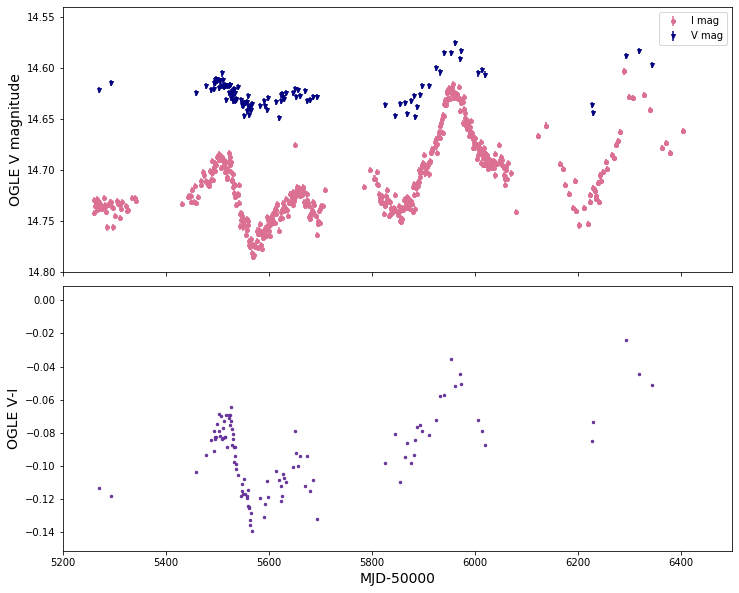

In [50]:
#zoom in on first couple of flares
#plot V, I, and V-I vs. time
fig,ax = plt.subplots(2,1,sharex=True,figsize=(12,10))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred',label='I mag')
ax[0].set_ylim(14.8,14.54)
ax[1].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[0].errorbar(lv['MJD-50000'],lv['V mag'],yerr=lv['V mag err'],marker='v',markersize=4,linestyle='None',color='navy',label='V mag')
ax[1].scatter(lv['MJD-50000'],lv['V mag']-l_interp,s=6,color='rebeccapurple')
ax[0].set_ylabel('OGLE V magnitude',fontsize=14)
ax[1].set_ylabel('OGLE V-I',fontsize=14)
ax[0].legend()
#ax[1].set_ylim(-.11,.02)
plt.xlim(5200,6500)
#sf('firstthreeVI')

# Compare Relative Variability 
> like pulsed fraction; with fractional variability
- just LXP 69.5 for now

In [51]:
lv['V mag'].max()/lv['V mag'].min()

1.0067349323070578

In [52]:
li['I mag'].max()/li['I mag'].min()

1.0158719252439192

In [53]:
(lv['V mag'].max()-lv['V mag'].min())/lv['V mag'].min()

0.006734932307057863

In [54]:
(li['I mag'].max()-li['I mag'].min())/li['I mag'].min()

0.01587192524391919

In [55]:
(lv['V mag'].min()-np.median(lv['V mag']))/np.median(lv['V mag'])

-0.004991794310722128

In [56]:
(lv['V mag'].max()-np.mean(lv['V mag']))

0.028305785123968974

In [57]:
(lv['V mag'].max()-np.median(lv['V mag']))/np.median(lv['V mag'])

0.001709518599562266

In [58]:
(li['I mag'].min()-np.median(li['I mag']))/np.median(li['I mag'])

-0.009595100374276966

> these all are ways to show how there's higher variability in I than in V
- just a matter of what's used in the literature
- can also try rms version
- first: try plotting difference from each median
**just find amplitudes and stdev**

In [59]:
print('V mag median minus min: ',np.abs(lv['V mag'].min()-np.median(lv['V mag'])))
print('V mag max minus median: ',lv['V mag'].max()-np.median(lv['V mag']))
print('V mag standard deviation: ',np.std(lv['V mag']))


V mag median minus min:  0.0730000000000004
V mag max minus median:  0.02499999999999858
V mag standard deviation:  0.01852888875778726


In [60]:
print('I mag median minus min: ',np.abs(li['I mag'].min()-np.median(li['I mag'])))
print('I mag max minus median: ',li['I mag'].max()-np.median(li['I mag']))
print('I mag standard deviation: ',np.std(li['I mag']))

I mag median minus min:  0.14100000000000001
I mag max minus median:  0.08999999999999986
I mag standard deviation:  0.04543663090738568


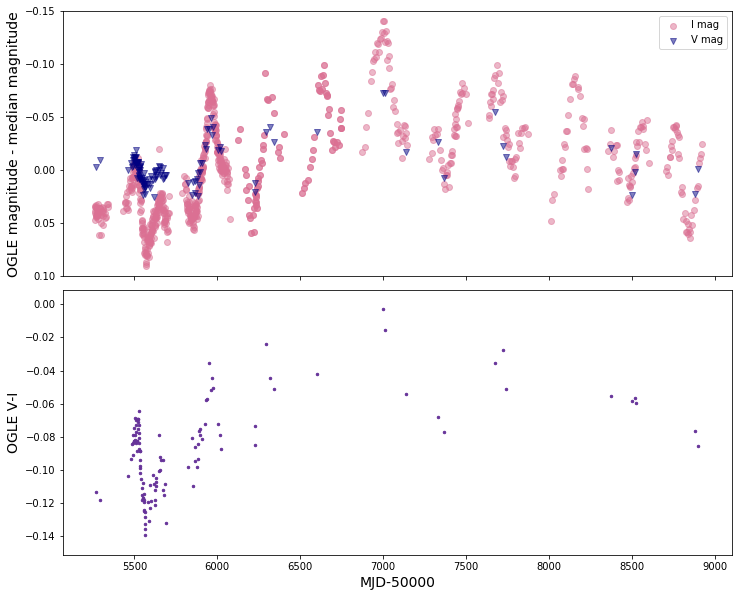

In [61]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(12,10))
plt.subplots_adjust(hspace=0.05)
ax[0].scatter(li['MJD-50000'],li['I mag']-np.median(li['I mag']),marker='o',alpha=.5,color='palevioletred',label='I mag')
ax[0].set_ylim(.1,-.15)
ax[1].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE magnitude',fontsize=14)
ax[0].scatter(lv['MJD-50000'],lv['V mag']-np.median(lv['V mag']),marker='v',color='navy',alpha=.5,label='V mag')
ax[1].scatter(lv['MJD-50000'],lv['V mag']-l_interp,s=6,color='rebeccapurple')
ax[0].set_ylabel('OGLE magnitude - median magnitude',fontsize=14)
ax[1].set_ylabel('OGLE V-I',fontsize=14)
ax[0].legend()
#ax[1].set_ylim(-.11,.02)
#plt.xlim(5200,6500)
#ax[0].set_title('Deviation from Median')
#sf('devmed')

In [62]:
li['MJD-50000'][850]-li['MJD-50000'][0]

3660.9362900000997

(5440, 5555)

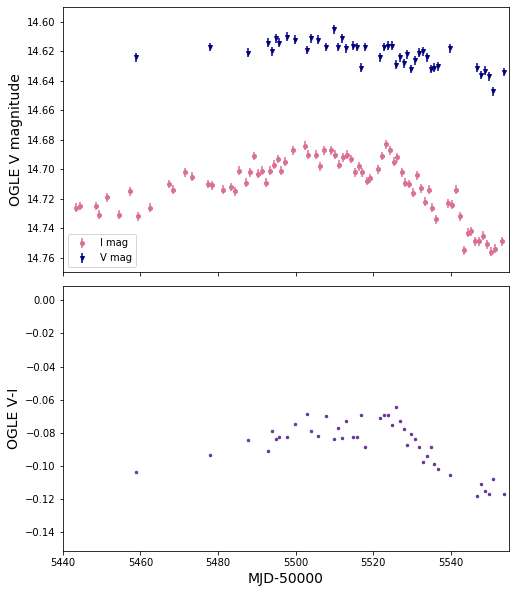

In [63]:
#zoom in on first couple of flares
#plot V, I, and V-I vs. time
fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,10))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred',label='I mag')
ax[0].set_ylim(14.77,14.59)
ax[1].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[0].errorbar(lv['MJD-50000'],lv['V mag'],yerr=lv['V mag err'],marker='v',markersize=4,linestyle='None',color='navy',label='V mag')
ax[1].scatter(lv['MJD-50000'],lv['V mag']-l_interp,s=6,color='rebeccapurple')
ax[0].set_ylabel('OGLE V magnitude',fontsize=14)
ax[1].set_ylabel('OGLE V-I',fontsize=14)
ax[0].legend(loc='lower left')
#ax[1].set_ylim(-.09,-.01)
plt.xlim(5440,5555)
#sf('oneflarezoom')

In [64]:
li['Phase 164'] = li['MJD-50000']%164
lv['Phase 153'] = (lv['MJD-50000']%153)/153
li['Phase 153'] = (li['MJD-50000']%153)/153
li['Phase 6467'] = (li['MJD-50000']%6467)/6467
lv['Phase 6467'] = (lv['MJD-50000']%6467)/6467
lv['Phase 3800'] = (lv['MJD-50000']%3800)/3800
li['Phase 3800'] = (li['MJD-50000']%3800)/3800

(14.66, 14.54)

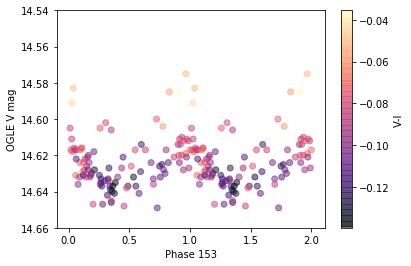

In [65]:

plt.scatter(lv['Phase 153'][:-19],lv['V mag'][:-19],c=lv['V mag'][:-19]-l_interp[:-19],alpha=.5,cmap='magma')
plt.scatter(1+lv['Phase 153'][:-19],lv['V mag'][:-19],c=lv['V mag'][:-19]-l_interp[:-19],alpha=.5,cmap='magma')
plt.colorbar(label='V-I')
plt.xlabel('Phase 153')
plt.ylabel('OGLE V mag')
plt.ylim(14.66,14.54)
#plt.scatter(li['Phase 164'],li['I mag'],color='palevioletred',alpha=.5)
#sf('phase153')

In [66]:
li[410:420]

,JD,I mag,I mag err,MJD-50000,Phase 164,Phase 153,Phase 6467,Phase 3800
410,2.455997e+06,14.678,0.003,5996.11727,92.11727,0.190309,0.927187,0.577926
411,2.455998e+06,14.669,0.003,5997.11940,93.11940,0.196859,0.927342,0.578189
412,2.455999e+06,14.673,0.003,5998.11774,94.11774,0.203384,0.927496,0.578452
413,2.455999e+06,14.678,0.003,5998.17280,94.17280,0.203744,0.927505,0.578467
414,2.456000e+06,14.678,0.003,5999.15852,95.15852,0.210186,0.927657,0.578726
415,2.456001e+06,14.668,0.003,6000.13382,96.13382,0.216561,0.927808,0.578983
416,2.456003e+06,14.674,0.003,6002.09750,98.09750,0.229395,0.928112,0.579499
417,2.456004e+06,14.677,0.003,6003.06371,99.06371,0.235711,0.928261,0.579754
418,2.456005e+06,14.689,0.003,6004.12406,100.12406,0.242641,0.928425,0.580033
419,2.456006e+06,14.685,0.003,6005.10710,101.10710,0.249066,0.928577,0.580291


In [67]:
li['MJD-50000'][420:421]

420    6006.09104
Name: MJD-50000, dtype: float64

Text(0.5, 0, 'Phase (153 d)')

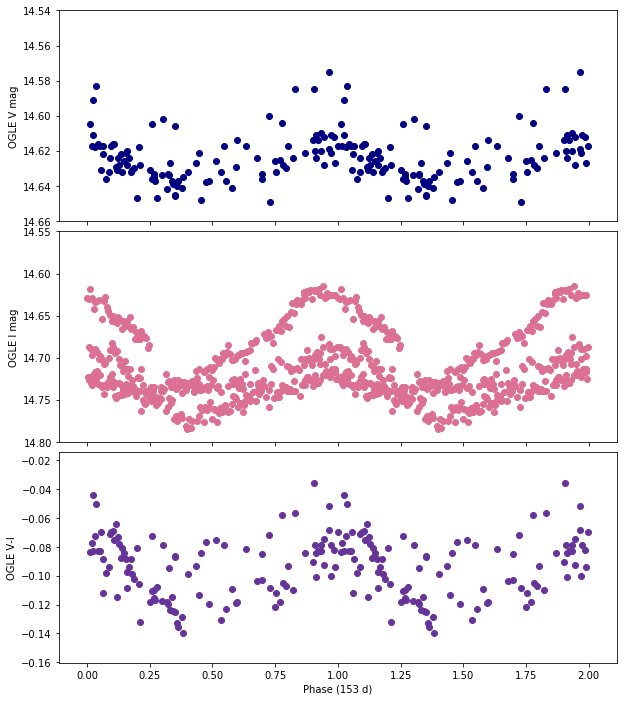

In [68]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(10,12))
plt.subplots_adjust(hspace=0.05)
ax[0].scatter(lv['Phase 153'][:-19],lv['V mag'][:-19],color='navy')
ax[0].scatter(1+lv['Phase 153'][:-19],lv['V mag'][:-19],color='navy')
ax[1].scatter(li['Phase 153'][:420],li['I mag'][:420],color='palevioletred')
ax[1].scatter(1+li['Phase 153'][:420],li['I mag'][:420],color='palevioletred')
#V-I
ax[2].scatter(lv['Phase 153'][:-19],lv['V mag'][:-19]-l_interp[:-19],color='rebeccapurple')
ax[2].scatter(1+lv['Phase 153'][:-19],lv['V mag'][:-19]-l_interp[:-19],color='rebeccapurple')
ax[2].set_ylabel('OGLE V-I')

ax[0].set_ylim(14.66,14.54)
ax[1].set_ylim(14.8,14.55)
plt.xlabel('Phase')
ax[0].set_ylabel('OGLE V mag')
ax[1].set_ylabel('OGLE I mag')
ax[2].set_xlabel('Phase (153 d)')
#sf('3magphase')
#plt.scatter(li['Phase 164'],li['I mag'],color='palevioletred',alpha=.5)

Text(0, 14.75, 'period = 3800 d')

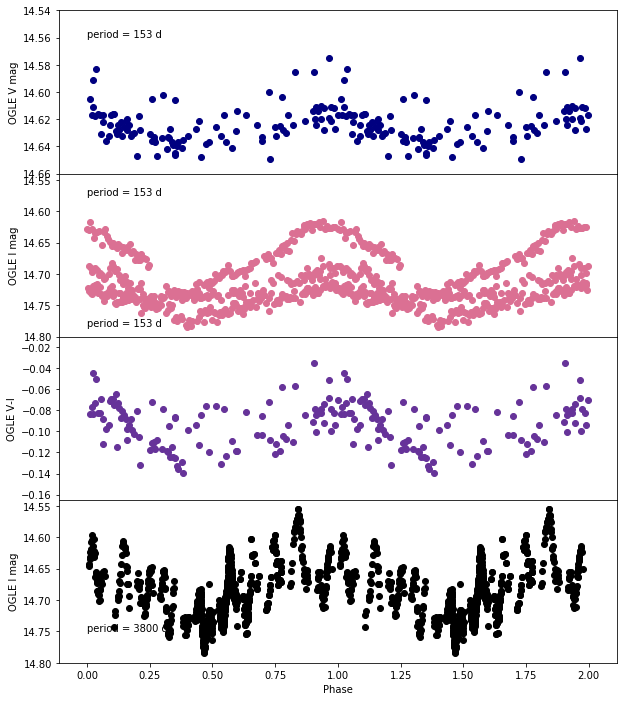

In [69]:
fig,ax = plt.subplots(4,1,sharex=True,figsize=(10,12))
plt.subplots_adjust(hspace=0)
ax[0].scatter(lv['Phase 153'][:-19],lv['V mag'][:-19],color='navy')
ax[0].scatter(1+lv['Phase 153'][:-19],lv['V mag'][:-19],color='navy')
ax[1].scatter(li['Phase 153'][:420],li['I mag'][:420],color='palevioletred')
ax[1].scatter(1+li['Phase 153'][:420],li['I mag'][:420],color='palevioletred')
#V-I
ax[2].scatter(lv['Phase 153'][:-19],lv['V mag'][:-19]-l_interp[:-19],color='rebeccapurple')
ax[2].scatter(1+lv['Phase 153'][:-19],lv['V mag'][:-19]-l_interp[:-19],color='rebeccapurple')
ax[2].set_ylabel('OGLE V-I')

ax[3].scatter(li['Phase 3800'],li['I mag'],color='black')
ax[3].scatter(1+li['Phase 3800'],li['I mag'],color='black')
ax[3].set_ylim(14.8,14.54)
ax[0].set_ylim(14.66,14.54)
ax[1].set_ylim(14.8,14.54)
plt.xlabel('Phase')
ax[0].set_ylabel('OGLE V mag')
ax[1].set_ylabel('OGLE I mag')
ax[3].set_ylabel('OGLE I mag')
ax[0].text(0,14.56,'period = 153 d')
ax[1].text(0,14.575,'period = 153 d')
ax[2].text(0,0,'period = 153 d')
#plt.ylim(14.66,14.54)
ax[3].text(0,14.75,'period = 3800 d')

In [71]:
model = np.polyfit(lv['V mag'],l_interp, 1)

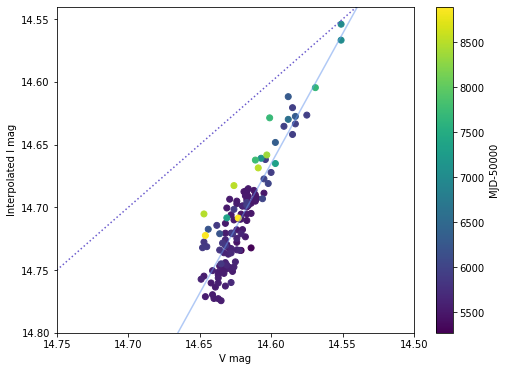

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(lv['V mag'],l_interp,c=lv['MJD-50000'])
plt.colorbar(label='MJD-50000')
plt.xlim(14.75,14.5)
plt.ylim(14.8,14.54)
plt.xlabel('V mag')
plt.ylabel('Interpolated I mag')
x = np.linspace(14.75,14.5)
plt.plot(x,x,color='slateblue',linestyle='dotted')

#plt.plot(x,x+.1)
plt.plot(x,model[0]*x+model[1],alpha=.5,color='cornflowerblue')
#plt.plot(x,model2[0]*x+model2[1],alpha=.5,color='cornflowerblue')

In [73]:
model2 = np.polyfit(lv['V mag'][:70],l_interp[:70], 1)

In [74]:
model2

array([  2.30520304, -18.99118995])

In [75]:
np.corrcoef(lv['V mag'],l_interp)

array([[1.        , 0.90502556],
       [0.90502556, 1.        ]])

Text(0, 0.5, 'Interpolated I mag')

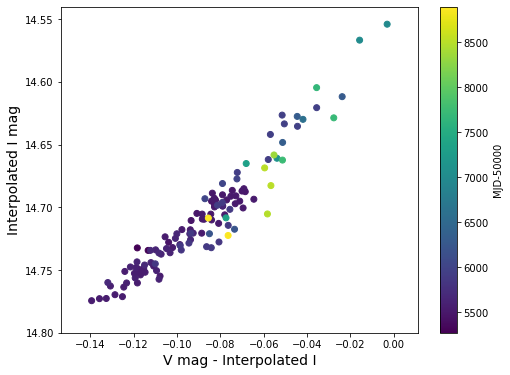

In [76]:
#just color-mag but with I instead of V
plt.figure(figsize=(8,6))
plt.scatter(lv['V mag']-l_interp,l_interp,c=lv['MJD-50000'])
plt.colorbar(label='MJD-50000')
#plt.xlim(14.75,14.5)
plt.ylim(14.8,14.54)
plt.xlabel('V mag - Interpolated I',fontsize=14)
plt.ylabel('Interpolated I mag',fontsize=14)
#x = np.linspace(14.75,14.5)
#plt.plot(x,x,color='slateblue',linestyle='dotted')

#plt.plot(x,x+.1)
#plt.plot(x,model[0]*x+model[1],alpha=.5,color='cornflowerblue')
#sf('interpcolormag')

Text(0.5, 0, 'Interpolated I mag')

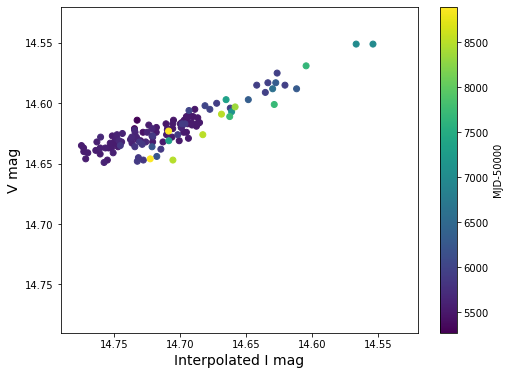

In [77]:
#follow-up: V vs. I_int
plt.figure(figsize=(8,6))
plt.scatter(l_interp,lv['V mag'],c=lv['MJD-50000'])
plt.colorbar(label='MJD-50000')
plt.xlim(14.79,14.52)
plt.ylim(14.79,14.52)
#plt.ylim(14.66,14.54)
plt.ylabel('V mag',fontsize=14)
plt.xlabel('Interpolated I mag',fontsize=14)
#sf('VI_int')

In [78]:
lv['MJD-50000'][70:80]

70    5650.56118
71    5652.56266
72    5656.53050
73    5659.56005
74    5670.51342
75    5674.53980
76    5679.52963
77    5685.52444
78    5693.48503
79    5825.86113
Name: MJD-50000, dtype: float64

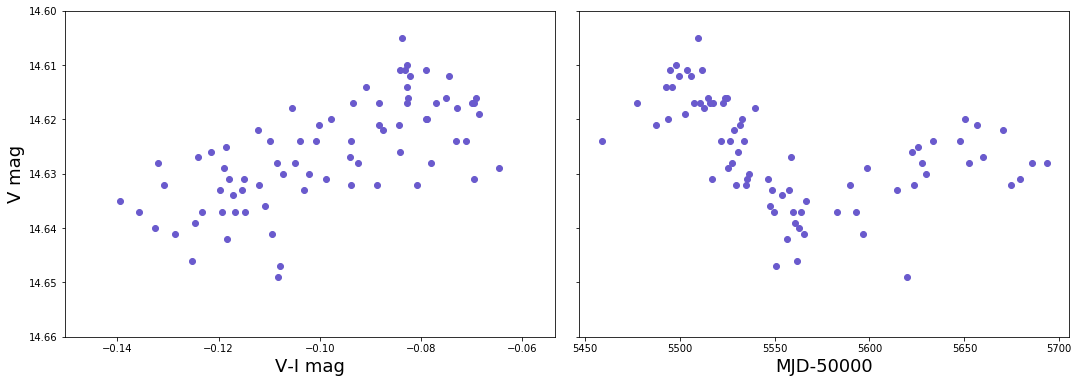

In [79]:
#data 55400-55800; originally used colorbar for time
fig,ax = plt.subplots(1,2,figsize=(18,6),sharey=True)
im=ax[0].scatter(lv['V mag'][2:79]-l_interp[2:79],lv['V mag'][2:79],color='slateblue')
#fig.colorbar(im,ax=ax,label='MJD-50000')
#plt.xlim(14.79,14.52)
#plt.ylim(14.79,14.52)
ax[0].set_ylim(14.66,14.6)
ax[0].set_ylabel('V mag',fontsize=18)
#ax[1].set_ylabel('V mag',fontsize=14)
plt.subplots_adjust(wspace=.05)
ax[0].set_xlabel('V-I mag',fontsize=18)
ax[1].set_xlabel('MJD-50000',fontsize=18)
ax[1].scatter(lv['MJD-50000'][2:79],lv['V mag'][2:79],color='slateblue')
#sf('48sub')


Text(0, 0.5, 'V mag')

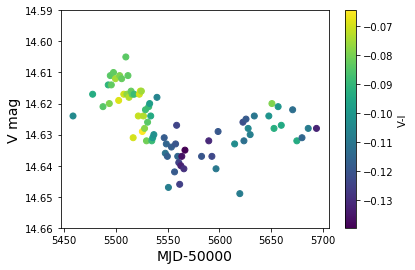

In [80]:
plt.scatter(lv['MJD-50000'][2:79],lv['V mag'][2:79],c=lv['V mag'][2:79]-l_interp[2:79])
plt.colorbar(label='V-I')
plt.ylim(14.66,14.59)
plt.xlabel('MJD-50000',fontsize=14)
plt.ylabel('V mag',fontsize=14)
#sf('48')

In [81]:
np.max(lv['V mag']-l_interp)

-0.0030000000000001137

In [82]:
ivmod = np.polyfit(lv['V mag'],l_interp, 1)

In [83]:
ivmod

array([  2.0680136 , -15.52793386])

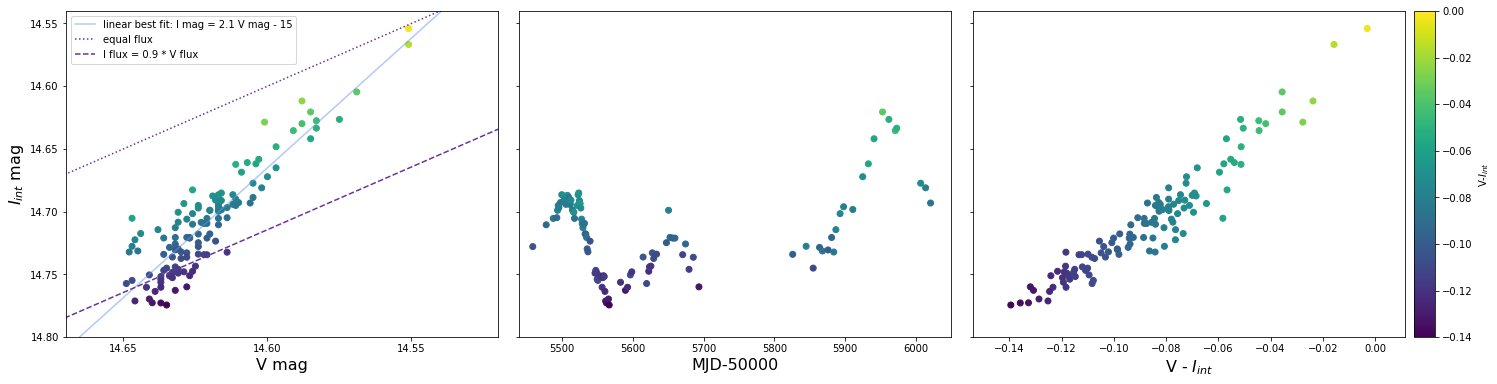

In [84]:
#three figures: I vs. V; V vs. time with V-I colorbar for limits above; I vs. V-I
fig,ax=plt.subplots(1,3,figsize=(24,6),sharey=True)
plt.subplots_adjust(wspace=.05)
#ax[1].scatter(lv['MJD-50000'][2:79],l_interp[2:79],c=lv['V mag'][2:79]-l_interp[2:79],vmin=-.14,vmax=0)
ax[1].scatter(lv['MJD-50000'],l_interp,c=lv['V mag']-l_interp,vmin=-.14,vmax=0)
ax[1].set_xlim(5440,6050)
ax[1].set_xlabel('MJD-50000',fontsize=16)
ax[0].set_ylabel('$I_{int}$ mag',fontsize=16)
#ax[1].set_ylim(14.78,14.68)
vlin = np.linspace(14.8,14.5)
ax[0].plot(vlin,ivmod[0]*vlin+ivmod[1],alpha=.5,color='cornflowerblue',label='linear best fit: I mag = 2.1 V mag - 15')
ax[0].plot(vlin,vlin,color='rebeccapurple',linestyle='dotted',label='equal flux')
ax[0].plot(vlin,vlin-2.5*np.log10(.9),color='rebeccapurple',linestyle='dashed',label='I flux = 0.9 * V flux')

ax[0].legend()
im=ax[0].scatter(lv['V mag'],l_interp,c=lv['V mag']-l_interp,vmin=-.14,vmax=0)
ax[0].set(xlim=(14.67,14.52),ylim=(14.8,14.54),xticks=[14.8,14.75,14.7,14.65,14.6,14.55])
ax[0].set_xlabel('V mag',fontsize=16)
ax[2].set_xlabel('V - $I_{int}$',fontsize=16)
ax[2].scatter(lv['V mag']-l_interp,l_interp,c=lv['V mag']-l_interp,vmin=-.14,vmax=0)
ax[2].set_ylim(14.8,14.54)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax[2],
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.02, 0., 1, 1),
                   bbox_transform=ax[2].transAxes,
                   borderpad=0
                   )
#ax[0].text(14.53,14.67,'V-I',rotation=90,fontsize=14)
fig.colorbar(im,cax=axins,orientation='vertical',label='V-$I_{int}$',pad=.01)
#ax[2].yaxis.set_tick_params(labelleft=True)
#sf('threepanel')

In [85]:
#use period equation to phase-fold all data (from parabolic fit in OGLE_Periods_LXP69.5)
pfit = np.array([-3.58526705e-07,  1.06393351e-02, -4.77263286e+01])

In [86]:
def parabola(x, a, b, c):
    x = np.array(x)
    return a*x**2 + b*x + c

In [87]:
ishift_t = (parabola(li['MJD-50000'],*pfit))%1
vshift_t = (parabola(lv['MJD-50000'],*pfit))%1

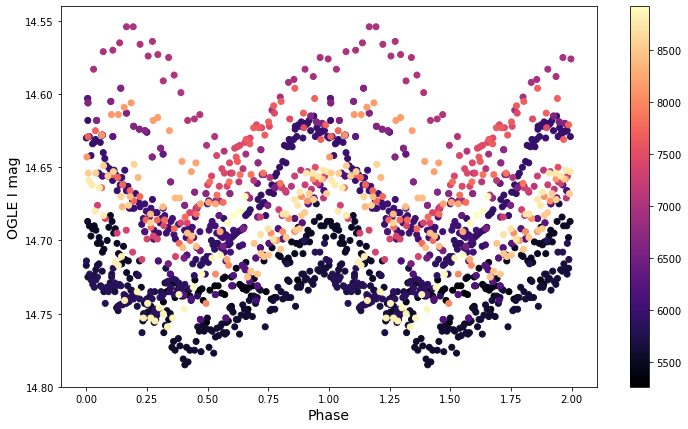

In [88]:
plt.figure(figsize=(12,7))
plt.ylim(14.8,14.54)
plt.scatter(ishift_t,li['I mag'],c=li['MJD-50000'],cmap='magma')
plt.scatter(1+ishift_t,li['I mag'],c=li['MJD-50000'],cmap='magma')
plt.ylabel('OGLE I mag',fontsize=14)
plt.xlabel('Phase',fontsize=14)
plt.colorbar()
#sf('Iphase')

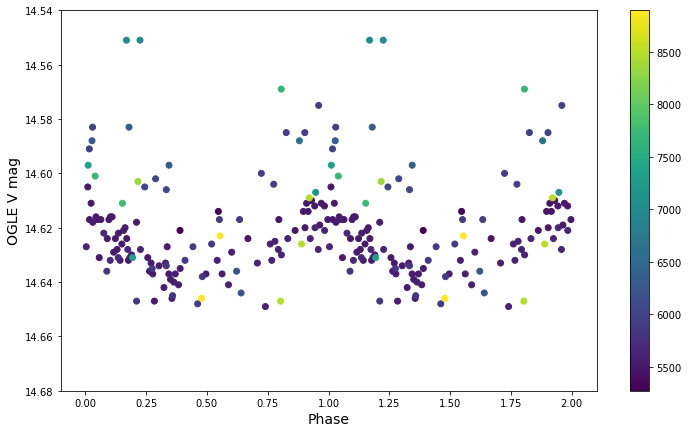

In [89]:
plt.figure(figsize=(12,7))
plt.ylim(14.68,14.54)
plt.scatter(vshift_t,lv['V mag'],c=lv['MJD-50000'],cmap='viridis')
plt.scatter(1+vshift_t,lv['V mag'],c=lv['MJD-50000'],cmap='viridis')
plt.ylabel('OGLE V mag',fontsize=14)
plt.xlabel('Phase',fontsize=14)
plt.colorbar()

(14.66, 14.54)

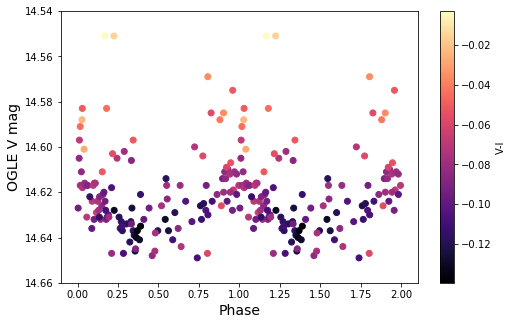

In [90]:
#V-I
plt.figure(figsize=(8,5))
#plt.ylim(14.68,14.54)
plt.scatter(vshift_t,lv['V mag'],c=lv['V mag']-l_interp,cmap='magma')
plt.scatter(1+vshift_t,lv['V mag'],c=lv['V mag']-l_interp,cmap='magma')
plt.ylabel('OGLE V mag',fontsize=14)
plt.xlabel('Phase',fontsize=14)
plt.colorbar(label='V-I')
plt.ylim(14.66,14.54)
#sf('vphasefoldvi')

In [91]:
Imag=li['I mag']
window=201 #also tested other windows to make sure periodogram results unaffected
print('Smooth (window = ', window, ') and detrend data...')
Ismooth = signal.savgol_filter(Imag, window, 1)
Imean = np.mean(Imag)
print('Average I band magnitude', Imean)
li['I detrend 2'] = Imag-Ismooth  + li['I mag'].mean()

Smooth (window =  201 ) and detrend data...
Average I band magnitude 14.691636897767347


Text(0, 0.5, 'OGLE I mag')

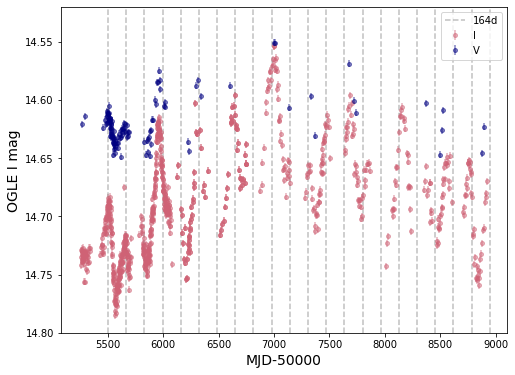

In [92]:
plt.figure(figsize=(8,6))
plt.errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,alpha=.5,linestyle='None',color='#CF6275',label='I')
plt.errorbar(lv['MJD-50000'],lv['V mag'],yerr=lv['V mag err'],marker='o',markersize=4,alpha=.5,linestyle='None',color='navy',label='V')
plt.ylim(14.8,14.52)
for i in range(1,22):
     plt.axvline(5503+i*164,0,1,linestyle='dashed',color='grey',alpha=.5)
plt.axvline(5503,0,1,linestyle='dashed',color='grey',alpha=.5,label='164d')
plt.legend(loc='upper right')
plt.xlabel('MJD-50000',fontsize=14)
plt.ylabel('OGLE I mag',fontsize=14)
#sf('VI86')

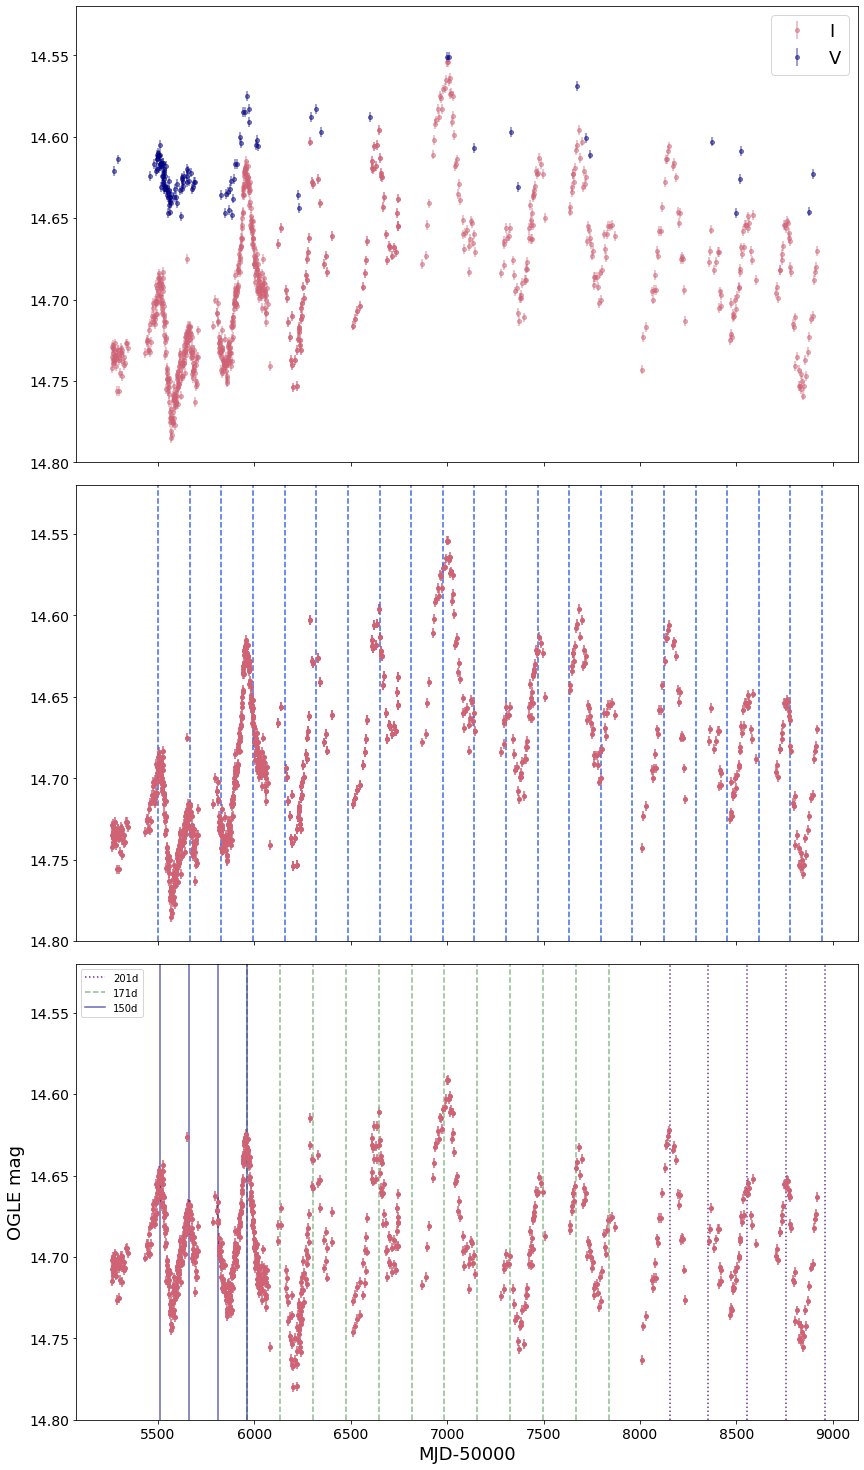

In [93]:
#three panel figure
fig,ax=plt.subplots(3,1,figsize=(14,26),sharex=True,sharey=True)

ax[0].errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,alpha=.5,linestyle='None',color='#CF6275',label='I')
ax[0].errorbar(lv['MJD-50000'],lv['V mag'],yerr=lv['V mag err'],marker='o',markersize=4,alpha=.5,linestyle='None',color='navy',label='V')

#plt.tick_params(labelsize=14)
ax[0].legend(fontsize=18)

ax[1].errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='#CF6275')
#flipped y axis since showing magnitudes
for i in range(0,22):
    ax[1].axvline(5501+i*164,0,1,linestyle='dashed',color='royalblue')

ax[2].errorbar(li['MJD-50000'],li['I detrend 2'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='#CF6275')
ax[2].set_ylim(14.8,14.52)
ax[2].axvline(8155,0,1,linestyle='dotted',color='rebeccapurple',label='201d')
for i in range(1,5):
    ax[2].axvline(8155+201*i,0,1,linestyle='dotted',color='rebeccapurple')
ax[2].axvline(5960,0,1,linestyle='dashed',color='darkseagreen',label='171d')
for i in range(1,12):
    ax[2].axvline(5960+171*i,0,1,linestyle='dashed',color='darkseagreen')
plt.axvline(5510,0,1,color='navy',linestyle='solid',label='150d',alpha=.6)
for i in range(1,4):
    ax[2].axvline(5510+150*i,0,1,color='navy',linestyle='solid',alpha=.6)
#for i in range(len(flaremid)):
    #plt.axvline(flaremid[i],0,1,color=c3)

#for j in range(10,len(flaremid)):
    #plt.axvline(flaremid[j],0,1,color='palevioletred')
ax[2].set_xlabel('MJD-50000',fontsize=18)
ax[2].set_ylabel('OGLE mag',fontsize=18)
ax[2].legend()
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

plt.subplots_adjust(hspace=0.05)

#sf('3panellc')

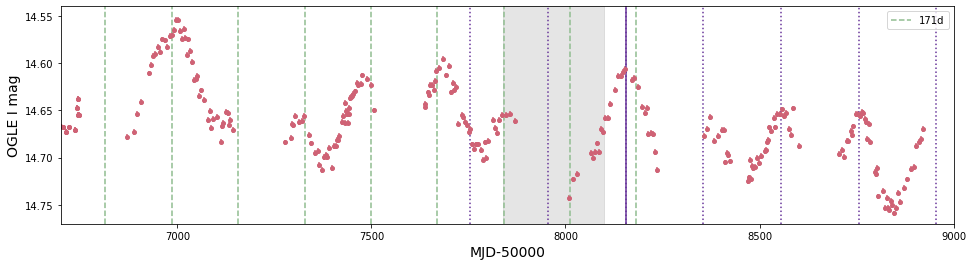

In [94]:
#zoom on most recent big flare
plt.figure(figsize=(16,4))
plt.errorbar(li['MJD-50000'],li['I mag'],yerr=li['I mag err'],marker='o',markersize=4,linestyle='None',color='#CF6275')
plt.ylim(14.77,14.54)
#plt.axvline(8155,0,1,linestyle='dotted',color='rebeccapurple',label='200d')
plt.axvline(8155,0,1,linestyle='solid',color='rebeccapurple')

for i in range(-2,5):
    plt.axvline(8155+200*i,0,1,linestyle='dotted',color='rebeccapurple')
plt.axvline(5960,0,1,linestyle='dashed',color='darkseagreen',label='171d')

for i in range(1,14):
    plt.axvline(5960+171*i,0,1,linestyle='dashed',color='darkseagreen')
plt.xlim(6700,9000)
plt.axvspan(7840,8100,color='grey',alpha=.2)
#for i in range(len(flaremid)):
    #plt.axvline(flaremid[i],0,1,color=c3)

#for j in range(10,len(flaremid)):
    #plt.axvline(flaremid[j],0,1,color='palevioletred')
plt.xlabel('MJD-50000',fontsize=14)
plt.ylabel('OGLE I mag',fontsize=14)
plt.legend()
#sf('r2r3switch')

> - 316 between those two maxima, so we would think there's another peak between, but then the period would have to be much shorter
- realy small maximum before that, unless it continued into a second peak

In [95]:
8156-7840 #approximate distances between centers

316

# Starting Again with J01077
> delete older shifted plots once remade with correct shifts

- V band already calibrated, so don't do any shift
- just calibrate I O-IV by adding .041 mag

V-band data files are calibrated to the standard VI system. In the case of I-band - O-III and O-II data files are calibrated and if you have O-IV data file from our XROM page - you have to ADD 0.041 mag to have calibrated photometry as well. The first calibrated O-IV observation in the I-band should read:  5260.64719 14.742 0.003 

this is for LXP 69.5

apparently V band is calibrated? so going to make plots with it unshifted
and then I is good in OGLE II and II, so just shift by about .15 in IV

so manually for plots shifting I IV by .14 and all other epochs as is

In [96]:
li.head()

,JD,I mag,I mag err,MJD-50000,Phase 164,Phase 153,Phase 6467,Phase 3800,I detrend 2
0,2.455261e+06,14.742,0.003,5260.14719,12.14719,0.380047,0.813383,0.384249,14.714925
1,2.455262e+06,14.729,0.003,5261.15051,13.15051,0.386605,0.813538,0.384513,14.701785
2,2.455263e+06,14.735,0.003,5262.14427,14.14427,0.393100,0.813692,0.384775,14.707645
3,2.455265e+06,14.733,0.003,5264.11167,16.11167,0.405959,0.813996,0.385293,14.705505
4,2.455266e+06,14.730,0.003,5265.11299,17.11299,0.412503,0.814151,0.385556,14.702365


Text(0, 0.5, 'OGLE V magnitude')

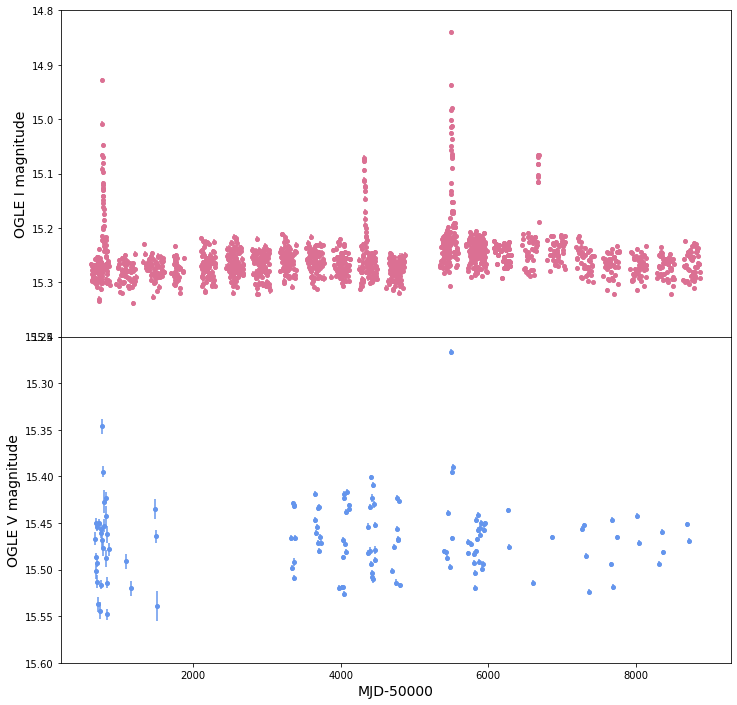

In [97]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(12,12))
plt.subplots_adjust(hspace=0)
ax[0].errorbar(ji2['MJD-50000'],ji2['I mag'],yerr=ji2['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].errorbar(ji3['MJD-50000'],ji3['I mag'],yerr=ji3['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].errorbar(ji4['MJD-50000'],ji4['I mag']+.112,yerr=ji4['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')


ax[0].set_ylim(15.4,14.8)
ax[1].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[1].errorbar(jv2['MJD-50000'],jv2['V mag'],yerr=jv2['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].errorbar(jv3['MJD-50000'],jv3['V mag'],yerr=jv3['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].errorbar(jv4['MJD-50000'],jv4['V mag'],yerr=jv4['V mag err'],marker='o',markersize=4,linestyle='None',color='cornflowerblue')
ax[1].set_ylim(15.6,15.25)
ax[1].set_ylabel('OGLE V magnitude',fontsize=14)

In [98]:
ji4['I mag'] += .112
jv = [jv2,jv3,jv4]
ji = [ji2,ji3,ji4]
ji = pd.concat(ji)
jv = pd.concat(jv)

In [99]:
ji4.head()

,JD,I mag,I mag err,MJD,MJD-50000
0,2.455347e+06,15.272,0.003,55346.43180,5346.43180
1,2.455348e+06,15.268,0.003,55347.41257,5347.41257
2,2.455359e+06,15.261,0.003,55358.40324,5358.40324
3,2.455365e+06,15.235,0.003,55364.41546,5364.41546
4,2.455377e+06,15.221,0.003,55376.43746,5376.43746


Text(0, 0.5, 'OGLE magnitude')

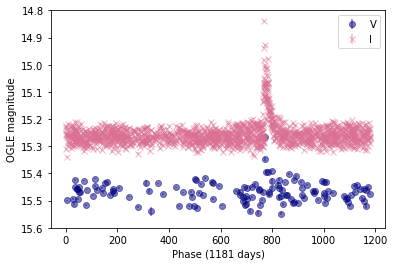

In [100]:
#one plot; can shift I mag up more to see better (.2)
jv['Phase 1181'] = jv['MJD-50000']%1181
plt.errorbar(jv['Phase 1181'], jv['V mag'],yerr=jv['V mag err'],color='navy',linestyle='none',marker='o',alpha=.5,label='V')
plt.ylim(15.6,14.8)
ji['Phase 1181'] = ji['MJD-50000']%1181
plt.errorbar(ji['Phase 1181'], ji['I mag'],yerr=ji['I mag err'],color='palevioletred',linestyle='none',marker='x',alpha=.5,label='I')
plt.legend()
plt.xlabel('Phase (1181 days)')
plt.ylabel('OGLE magnitude')
#sf('JVIstacked')

In [101]:
j_interp = np.interp(jv['MJD-50000'],ji['MJD-50000'],ji['I mag'])

In [102]:
jv.head()

,MJD-50000,V mag,V mag err,Phase 1181
0,689.82880,15.450,0.005,689.82880
1,673.81208,15.467,0.007,673.81208
2,685.84592,15.486,0.004,685.84592
3,686.83309,15.502,0.008,686.83309
4,697.79582,15.513,0.007,697.79582


Text(0, 0.5, 'OGLE V-I')

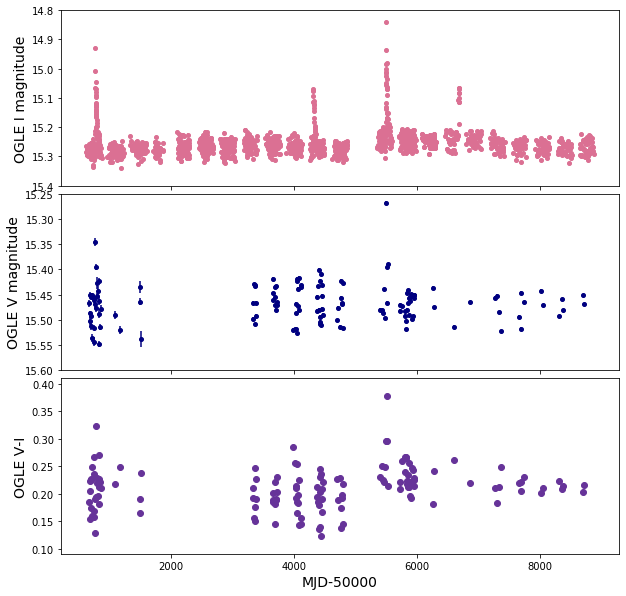

In [103]:
#plot V, I, and V-I vs. time
fig,ax = plt.subplots(3,1,sharex=True,figsize=(10,10))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(ji['MJD-50000'],ji['I mag'],yerr=ji['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].set_ylim(15.4,14.8)
ax[2].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[1].errorbar(jv['MJD-50000'],jv['V mag'],yerr=jv['V mag err'],marker='o',markersize=4,linestyle='None',color='navy')
ax[1].set_ylim(15.6,15.25)
ax[2].scatter(jv['MJD-50000'],jv['V mag']-j_interp,color='rebeccapurple')
ax[1].set_ylabel('OGLE V magnitude',fontsize=14)
ax[2].set_ylabel('OGLE V-I',fontsize=14)
#sf('JVIV-I')

Text(0, 0.5, 'OGLE V-I')

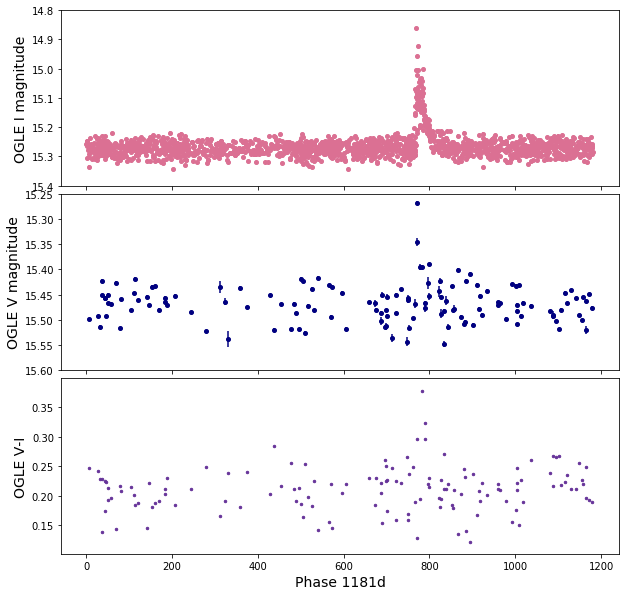

In [104]:
#plot V, I, and V-I vs. phase
fig,ax = plt.subplots(3,1,sharex=True,figsize=(10,10))
plt.subplots_adjust(hspace=0.05)
ax[0].errorbar(i24['Phase 1181'],i24['I mag'],yerr=i24['I mag err'],marker='o',markersize=4,linestyle='None',color='palevioletred')
ax[0].set_ylim(15.4,14.8)
ax[2].set_xlabel('Phase 1181d',fontsize=14)
ax[0].set_ylabel('OGLE I magnitude',fontsize=14)
ax[1].errorbar(jv['Phase 1181'],jv['V mag'],yerr=jv['V mag err'],marker='o',markersize=4,linestyle='None',color='navy')
ax[1].set_ylim(15.6,15.25)
ax[2].scatter(jv['Phase 1181'],jv['V mag']-j_interp,s=6,color='rebeccapurple')
ax[1].set_ylabel('OGLE V magnitude',fontsize=14)
ax[2].set_ylabel('OGLE V-I',fontsize=14)
#sf('Jmagphase')

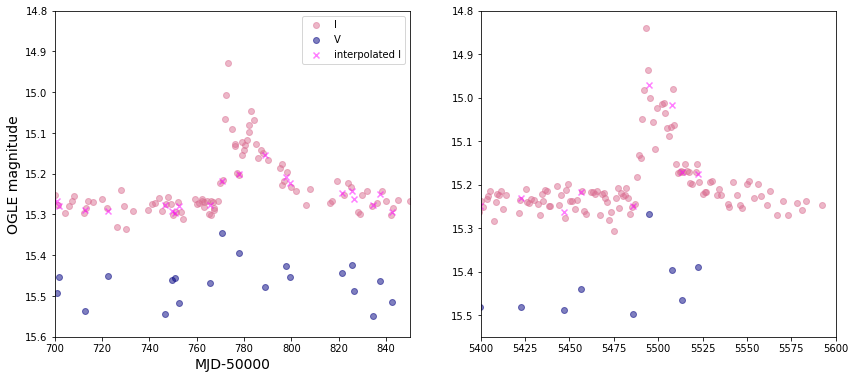

In [105]:
#zoom in on two flare that we have in both I and V
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].scatter(ji['MJD-50000'],ji['I mag'],alpha=.5,color='palevioletred',label='I')
ax[0].scatter(jv['MJD-50000'],jv['V mag'],alpha=.5,color='navy',label='V')
ax[0].set_xlim(700,850)
ax[0].set_ylim(15.6,14.8)
ax[1].scatter(i24['MJD-50000'],ji['I mag'],alpha=.5,color='palevioletred')
ax[1].scatter(jv['MJD-50000'],j_interp,color='magenta',marker='x',alpha=.5,label='interpolated I')
ax[0].scatter(jv['MJD-50000'],j_interp,color='magenta',marker='x',alpha=.5,label='interpolated I')

ax[1].scatter(jv['MJD-50000'],jv['V mag'],alpha=.5,color='navy')
ax[1].set_xlim(5400,5600)
ax[0].set_xlabel('MJD-50000',fontsize=14)
ax[0].set_ylabel('OGLE magnitude',fontsize=14)
ax[1].set_ylim(15.55,14.8)
ax[0].legend()
#sf('Jtwoflares')

### figure out time difference between V points near flares and closest I points -- add to Overleaf notes


In [106]:
jv[10:20] #peak at 770.7 (first V peak)

,MJD-50000,V mag,V mag err,Phase 1181
10,749.74862,15.461,0.005,749.74862
11,750.71056,15.456,0.006,750.71056
12,752.71073,15.516,0.005,752.71073
13,765.72807,15.468,0.009,765.72807
14,770.71427,15.346,0.008,770.71427
15,777.69652,15.395,0.006,777.69652
16,788.74322,15.477,0.008,788.74322
17,797.60971,15.427,0.012,797.60971
18,799.58006,15.453,0.007,799.58006
19,821.57206,15.443,0.011,821.57206


In [107]:
ji[70:84] #770.07 and 771.08

,JD,I mag,I mag err,MJD,MJD-50000,Phase 1181
70,2.450768e+06,15.283,0.005,50767.15743,767.15743,767.15743
71,2.450768e+06,15.288,0.005,50767.25206,767.25206,767.25206
72,2.450770e+06,15.266,0.004,50769.08165,769.08165,769.08165
73,2.450771e+06,15.223,0.004,50770.06942,770.06942,770.06942
74,2.450772e+06,15.215,0.004,50771.08397,771.08397,771.08397
75,2.450773e+06,15.066,0.004,50772.08269,772.08269,772.08269
76,2.450773e+06,15.008,0.004,50772.26389,772.26389,772.26389
77,2.450774e+06,14.928,0.003,50773.14454,773.14454,773.14454
78,2.450776e+06,15.091,0.004,50775.12689,775.12689,775.12689
79,2.450777e+06,15.126,0.004,50776.11613,776.11613,776.11613


In [108]:
#V mag second flare
jv[90:100]

,MJD-50000,V mag,V mag err,Phase 1181
3,5456.74811,15.4395,0.003,732.74811
4,5485.63072,15.4975,0.003,761.63072
5,5494.64680,15.2665,0.003,770.64680
6,5507.63519,15.3955,0.003,783.63519
7,5513.62699,15.4665,0.003,789.62699
8,5522.60659,15.3895,0.003,798.60659
9,5726.91958,15.4705,0.003,1002.91958
10,5726.95003,15.4825,0.003,1002.95003
11,5760.89326,15.4725,0.003,1036.89326
12,5803.79025,15.4835,0.003,1079.79025


In [109]:
ji[1060:1070]

,JD,I mag,I mag err,MJD,MJD-50000,Phase 1181
85,2.455493e+06,14.983,0.003,55492.10551,5492.10551,768.10551
86,2.455494e+06,14.839,0.003,55493.07569,5493.07569,769.07569
87,2.455495e+06,14.937,0.003,55494.11647,5494.11647,770.11647
88,2.455496e+06,15.001,0.003,55495.10621,5495.10621,771.10621
89,2.455498e+06,15.057,0.003,55497.08566,5497.08566,773.08566
90,2.455499e+06,15.118,0.003,55498.09358,5498.09358,774.09358
91,2.455500e+06,15.025,0.003,55499.10412,5499.10412,775.10412
92,2.455503e+06,15.015,0.003,55502.10454,5502.10454,778.10454
93,2.455504e+06,15.012,0.003,55503.07506,5503.07506,779.07506
94,2.455505e+06,15.036,0.003,55504.08550,5504.08550,780.08550


(15.57, 15.25)

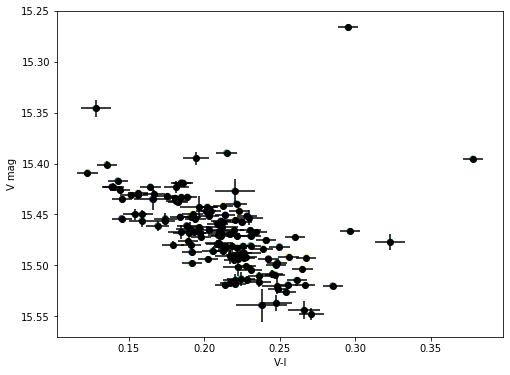

In [110]:
#color-magnitude
#plot V-I color, no error for now
je = np.ones(len(j_interp))
je = je*.006

verr = unumpy.uarray(jv['V mag'],jv['V mag err'])
jerr = unumpy.uarray(j_interp,je)
v_j = verr-jerr
v_j_err = unumpy.std_devs(v_j)
plt.figure(figsize=(8,6))
plt.scatter(jv['V mag']-j_interp,jv['V mag'],c=jv['Phase 1181'])
plt.errorbar(jv['V mag']-j_interp,jv['V mag'],yerr=jv['V mag err'],xerr=v_j_err,color='black',linestyle='none',marker='o')
plt.ylabel('V mag') 
plt.xlabel('V-I') #bluer when brighter; outliers during flares? need to get more spec phase values for those
plt.ylim(15.57,15.25)
#sf('Jcolormag')

(15.57, 15.25)

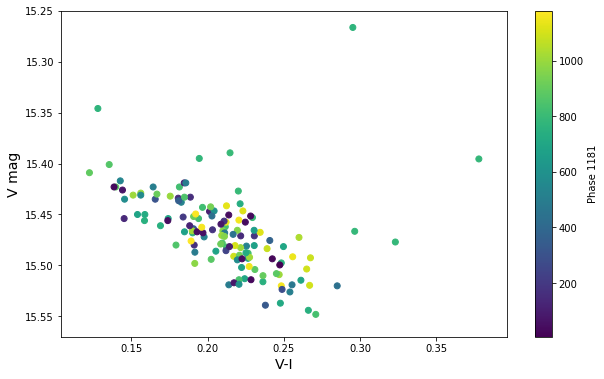

In [111]:
#color-magnitude
#plot V-I color, no error for now
plt.figure(figsize=(10,6))
plt.scatter(jv['V mag']-j_interp,jv['V mag'],c=jv['Phase 1181'])
plt.colorbar(label='Phase 1181') #remember flares happen around 800
plt.ylabel('V mag',fontsize=14) 
plt.xlabel('V-I',fontsize=14) #bluer when brighter; outliers during flares? need to get more spec phase values for those
plt.ylim(15.57,15.25)
#sf('Jcolormagcm')

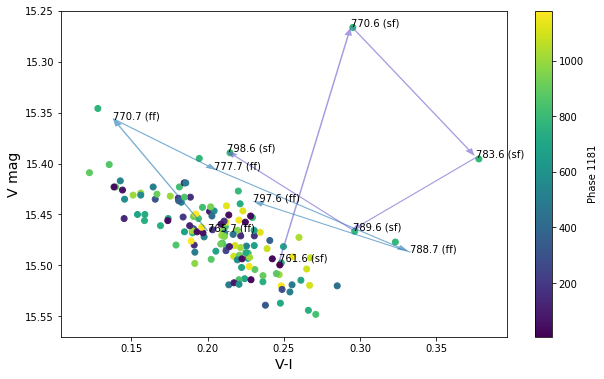

In [112]:
#adding arrows for time in color-mag
plt.figure(figsize=(10,6))
plt.scatter(jv['V mag']-j_interp,jv['V mag'],c=jv['Phase 1181'])
plt.colorbar(label='Phase 1181') #remember flares happen around 800
plt.ylabel('V mag',fontsize=14) 
plt.xlabel('V-I',fontsize=14) #bluer when brighter; outliers during flares? need to get more spec phase values for those
plt.ylim(15.57,15.25)
plt.text(.138,15.356,'770.7 (ff)')
plt.text(.204,15.405,'777.7 (ff)')
plt.text(.200,15.466,'765.7 (ff)')
plt.text(.333,15.487,'788.7 (ff)')
plt.text(.23,15.437,'797.6 (ff)')

plt.text(.294,15.265,'770.6 (sf)')
plt.text(.376,15.394,'783.6 (sf)') #check V and I around there
plt.text(.213,15.388,'798.6 (sf)') 
plt.text(.295,15.465,'789.6 (sf)') 
plt.text(.247,15.496,'761.6 (sf)') 

#adding arrows for each flare x,y,dx,dy
plt.arrow(.200,15.466,(.138-.2)*.94,(15.356-15.466)*.94,alpha=.6,linestyle=':',ec='None',head_width=.005,label='first flare')
plt.arrow(.138,15.356,(.204-.138)*.94,(15.405-15.356)*.94,alpha=.6,linestyle=':',ec='None',head_width=.005)
plt.arrow(.204,15.405,(.333-.204)*.94,(15.487-15.405)*.94,alpha=.6,linestyle=':',ec='None',head_width=.005)
plt.arrow(.333,15.487,(.23-.333)*.94,(15.437-15.487)*.94,alpha=.6,linestyle=':',ec='None',head_width=.005)

#second flare
plt.arrow(.247,15.496,(.294-.247)*.96,(15.265-15.496)*.96,alpha=.6,linestyle=':',ec='None',head_width=.005,color='slateblue',label='second flare')
plt.arrow(.294,15.265,(.376-.294)*.94,(15.394-15.265)*.94,alpha=.6,linestyle=':',ec='None',head_width=.005,color='slateblue')
plt.arrow(.376,15.394,(.295-.376)*.94,(15.465-15.394)*.94,alpha=.6,linestyle=':',ec='None',head_width=.005,color='slateblue')
plt.arrow(.295,15.465,(.213-.295)*.94,(15.388-15.465)*.94,alpha=.6,linestyle=':',ec='None',head_width=.005,color='slateblue')

#sf('arrowcmcb')



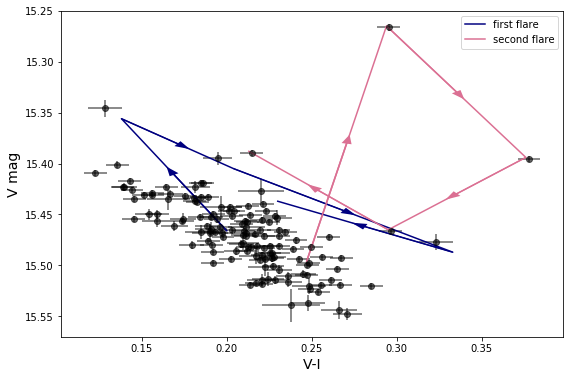

In [113]:
#adding arrows for time in color-mag
plt.figure(figsize=(9,6))
#plt.scatter(jv['V mag']-j_interp,jv['V mag'],c=jv['Phase 1181'])
plt.errorbar(jv['V mag']-j_interp,jv['V mag'],yerr=jv['V mag err'],xerr=v_j_err,color='black',linestyle='none',marker='o',alpha=.6)

#plt.colorbar(label='Phase 1181') #remember flares happen around 800
plt.ylabel('V mag',fontsize=14) 
plt.xlabel('V-I',fontsize=14) #bluer when brighter; outliers during flares? need to get more spec phase values for those
plt.ylim(15.57,15.25)
plt.plot((.2,.138,.204,.333,.23),(15.466,15.356,15.405,15.487,15.437),color='navy',label='first flare')
plt.plot((.247,.294,.376,.295,.213),(15.496,15.265,15.394,15.465,15.388),color='palevioletred',label='second flare')

#adding arrows for each flare x,y,dx,dy
plt.arrow(.200,15.466,(.138-.2)*.5,(15.356-15.466)*.5,linestyle=':',ec='None',head_width=.006,color='navy')
plt.arrow(.138,15.356,(.204-.138)*.5,(15.405-15.356)*.5,linestyle=':',ec='None',head_width=.006,color='navy')
plt.arrow(.204,15.405,(.333-.204)*.5,(15.487-15.405)*.5,linestyle=':',ec='None',head_width=.006,color='navy')
plt.arrow(.333,15.487,(.23-.333)*.5,(15.437-15.487)*.5,linestyle=':',ec='None',head_width=.006,color='navy')


#second flare
plt.arrow(.247,15.496,(.294-.247)*.5,(15.265-15.496)*.5,linestyle=':',ec='None',head_width=.006,color='palevioletred')
plt.arrow(.294,15.265,(.376-.294)*.5,(15.394-15.265)*.5,linestyle=':',ec='None',head_width=.006,color='palevioletred')
plt.arrow(.376,15.394,(.295-.376)*.5,(15.465-15.394)*.5,linestyle=':',ec='None',head_width=.006,color='palevioletred')
plt.arrow(.295,15.465,(.213-.295)*.5,(15.388-15.465)*.5,linestyle=':',ec='None',head_width=.006,color='palevioletred')

plt.legend()
#sf('arrowcm')

In [114]:
jv['V-I']=jv['V mag']-j_interp

In [115]:
jv[10:20]

,MJD-50000,V mag,V mag err,Phase 1181,V-I
10,749.74862,15.461,0.005,749.74862,0.169113
11,750.71056,15.456,0.006,750.71056,0.158654
12,752.71073,15.516,0.005,752.71073,0.236267
13,765.72807,15.468,0.009,765.72807,0.190161
14,770.71427,15.346,0.008,770.71427,0.128085
15,777.69652,15.395,0.006,777.69652,0.194550
16,788.74322,15.477,0.008,788.74322,0.323076
17,797.60971,15.427,0.012,797.60971,0.220153
18,799.58006,15.453,0.007,799.58006,0.229409
19,821.57206,15.443,0.011,821.57206,0.196668


In [116]:
#finding final outlier
jv.sort_values(by='V-I',ascending=False)

,MJD-50000,V mag,V mag err,Phase 1181,V-I
6,5507.63519,15.3955,0.003,783.63519,0.377815
16,788.74322,15.4770,0.008,788.74322,0.323076
7,5513.62699,15.4665,0.003,789.62699,0.296443
5,5494.64680,15.2665,0.003,770.64680,0.295207
18,3980.85164,15.5200,0.003,437.85164,0.284966
...,...,...,...,...,...
40,4428.65610,15.4230,0.004,885.65610,0.139779
50,4759.69296,15.4230,0.003,35.69296,0.138694
36,4408.65956,15.4010,0.003,865.65956,0.135508
14,770.71427,15.3460,0.008,770.71427,0.128085


Text(0, 0.5, 'OGLE V mag')

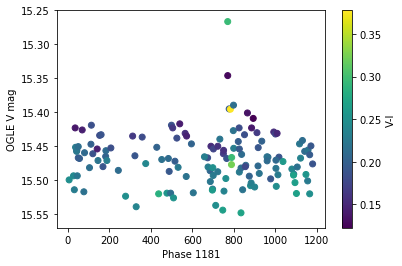

In [117]:
# V vs phase with V-I as color
plt.scatter(jv['Phase 1181'],jv['V mag'],c=jv['V mag']-j_interp)
plt.colorbar(label='V-I')
plt.ylim(15.57,15.25)
plt.xlabel('Phase 1181')
plt.ylabel('OGLE V mag') #bluer when brighter but not necessarily during flares?
#is interpolation see both as flaring?
#sf('Jmagphasecm')

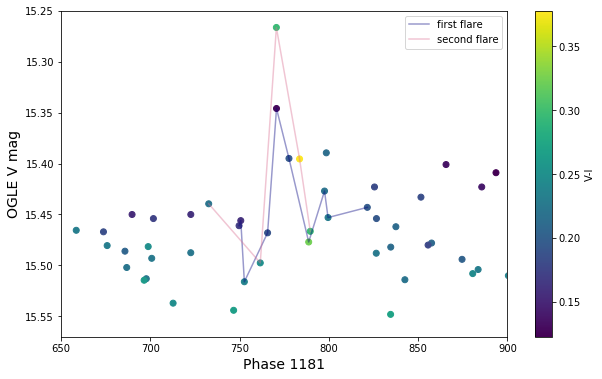

In [118]:
#adding arrows to above plot
plt.figure(figsize=(10,6))
plt.scatter(jv['Phase 1181'],jv['V mag'],c=jv['V mag']-j_interp)
plt.plot(jv['Phase 1181'][10:20],jv['V mag'][10:20],color='navy',alpha=.4,label='first flare')
plt.plot(jv['Phase 1181'][90:95],jv['V mag'][90:95],color='palevioletred',alpha=.4,label='second flare')


plt.colorbar(label='V-I')
plt.ylim(15.57,15.25)
plt.xlabel('Phase 1181',fontsize=14)
plt.ylabel('OGLE V mag',fontsize=14) #bluer when brighter but not necessarily during flares?
#is interpolation see both as flaring?
plt.xlim(650,900)
plt.legend()
#sf('phasepeak')